
# Telecom Churn Case Study
___

1. Data Exploration:
    - 1.1 Imports
2. Data Cleaning:
    - 2.1 Null values Check
    - 2.2 Remove unnessesary columns and rows if any
    - 2.3 Outliers
3. Graphical Analysis
    - 3.1 Univariate
    - 3.2 Bivariate
4. Feature Engineering 
5. Data Preparation
    - 5.1 Class Balancing
    - 5.2 Data Seggragation
    - 5.3 Over/Undersampling based on data variance
    - 5.4 Scaling
6. Model Building:
    - 6.1 Logistic Regression
    - 6.2 Decision Tree
    - 6.3 Random Forest
    - 6.4 XG Boost
7. Model Selection
    - 7.1 Best model selection based on parameters
    - 7.2 Best feature selection 
8. Best Model Application on Validation Data for Kaggle Score  

___
# 1. Data Exploration

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz


import itertools
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb



#### Import Data

In [3]:
train = pd.read_csv('train (1).csv')
validation = pd.read_csv('test (1).csv')

In [3]:
train.shape

(69999, 172)

In [4]:
train.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696

#### Class Variation of target Variable

In [5]:
round((train.churn_probability.value_counts()/train.churn_probability.size)*100,2)

0    89.81
1    10.19
Name: churn_probability, dtype: float64

##### Observation: 
- There is high class imbalance in the data. Churn = 1 being minor class which is of interest; We will have to oversample/undersample

___
___
# 2. Data Cleaning

#### Null value Checks

In [6]:
null_data_check = train.isnull().sum()
print("Number of columns in loan data: ",len(train.columns))
print("Number of columns that have null values: ",len(null_data_check[train.isnull().sum()!=0]))
print("Number of columns that have all null values: ", len(null_data_check[train.isnull().sum()==len(train)]))

Number of columns in loan data:  172
Number of columns that have null values:  125
Number of columns that have all null values:  0


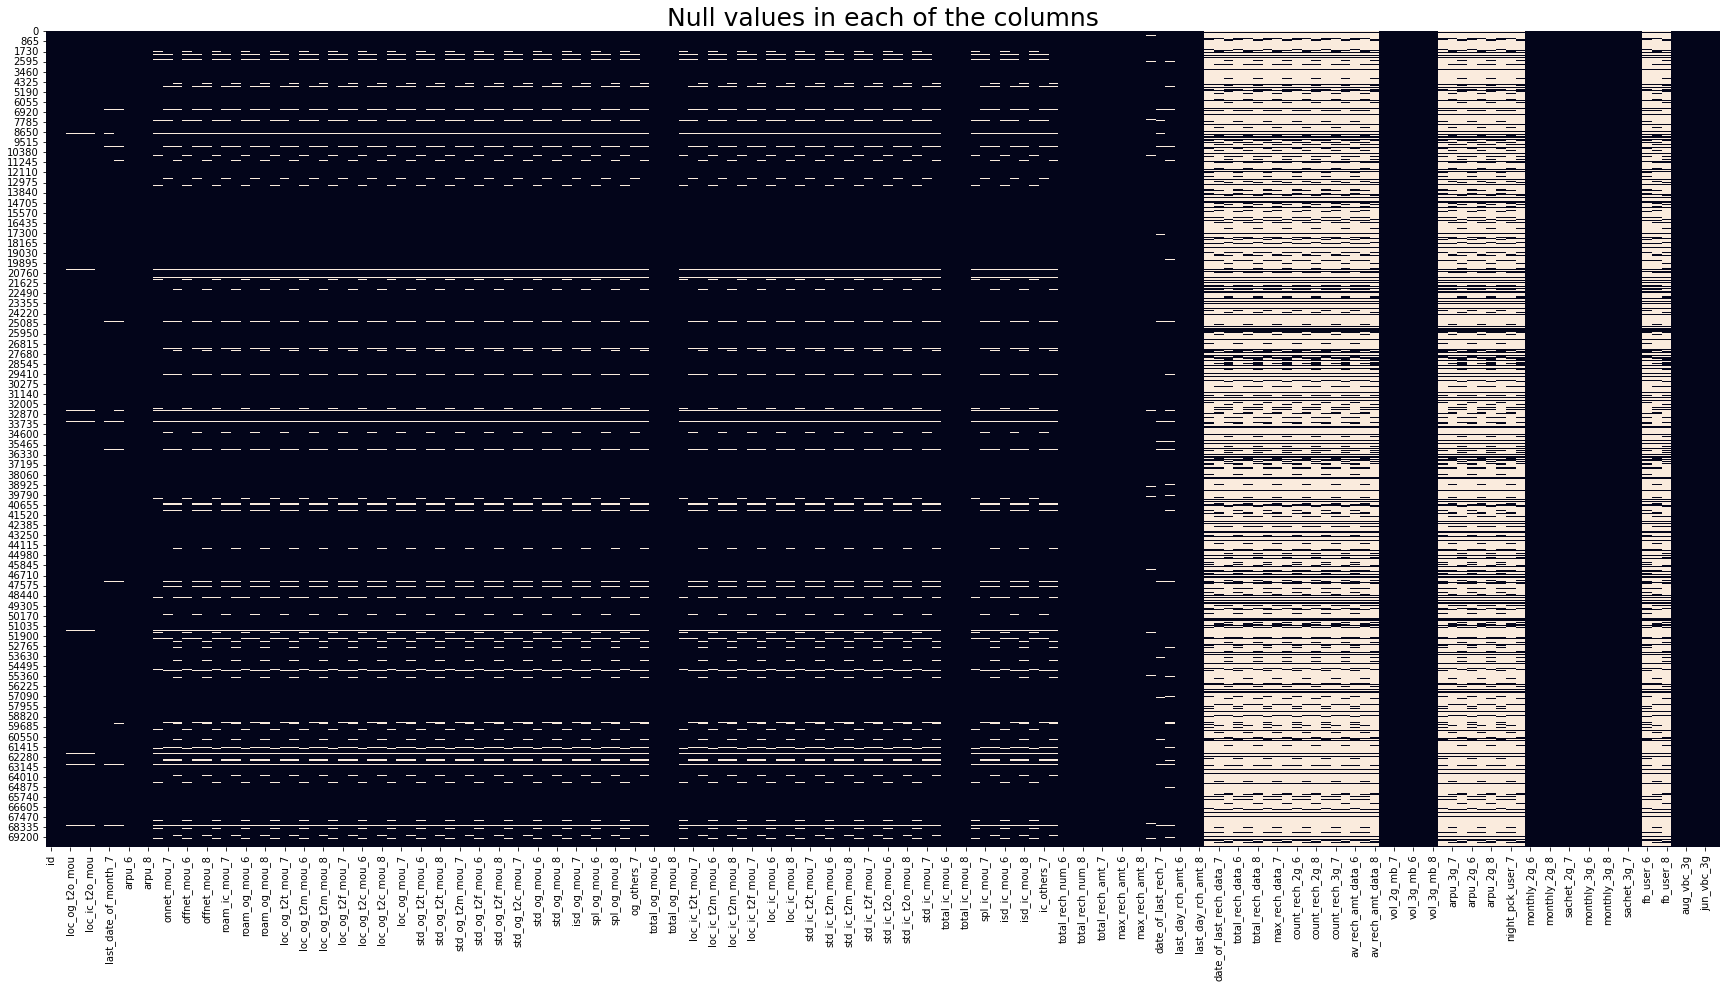

In [7]:
plt.figure(figsize=(30,15))
sns.heatmap(train.isnull(), cbar=False)
plt.title("Null values in each of the columns", fontdict={'fontsize':25})
plt.show()

##### Observations: 
There seems to be multiple records that have most of the values as 0; We can analyze these further and decide if we can remove these rows/columns

#### Check for single value columns

In [8]:
train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

##### Observations:
- We have very limited data for __mobile data packs__, hardly 30% of the data is populated for many of the columns
- We cold try to guage if there's any pattern to this else, we will simply drop the columns

In [9]:
date_list = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
for k in date_list:
    train[k] = pd.to_datetime(train[k])
    

In [10]:
# df['datediff_12'] = df.date_of_last_rech_7-df.date_of_last_rech_6
# df['datediff_23'] = df.date_of_last_rech_8-df.date_of_last_rech_7
# pd.to_timedelta(df.datediff_12, errors='coerce').dt.days
# pd.to_timedelta(df.datediff_23, errors='coerce').dt.days

#### Analysing for single value columns

In [11]:
single_value_cols = pd.DataFrame(columns=['Column', 'Nunique', 'Unique'])
for i in train.columns:
    single_value_cols.loc[len(single_value_cols)] = [i, train[i].nunique(), train[i].unique()]

t1 = single_value_cols[single_value_cols['Nunique'] == 1].sort_values(by='Nunique', ignore_index=True)
t1

Column  Nunique            Unique
0              circle_id        1             [109]
1         loc_og_t2o_mou        1        [0.0, nan]
2         std_og_t2o_mou        1        [0.0, nan]
3         loc_ic_t2o_mou        1        [0.0, nan]
4   last_date_of_month_6        1       [6/30/2014]
5   last_date_of_month_7        1  [7/31/2014, nan]
6   last_date_of_month_8        1  [8/31/2014, nan]
7       std_og_t2c_mou_6        1        [0.0, nan]
8       std_og_t2c_mou_7        1        [0.0, nan]
9       std_og_t2c_mou_8        1        [0.0, nan]
10      std_ic_t2o_mou_6        1        [0.0, nan]
11      std_ic_t2o_mou_7        1        [0.0, nan]
12      std_ic_t2o_mou_8        1        [0.0, nan]

##### Observations:
- These columns have either 0s or nulls
- null could mean not available data, or a perfect 0.
- Going with the meaning of the columns, these seem to be irrelavant as 0 or null, they do not help in classification problem, __hence can be removed__
- 'id' as a column would be of no help for classification as it is a unique value columns, for this reason we can seprate it out after preprocessing and remove while modelling
- the last_date_of_month_x are info columns that can be removed as they have single value
- circle_id can be removed for the same reason


- __Additionally__, there are date columns of last recharge that serve the same purpose as number of reacharge given the month. Hence we will remove date columns as well.

In [12]:
train['loc_og_t2o_mou'].value_counts()

0.0    69297
Name: loc_og_t2o_mou, dtype: int64

In [13]:
print("\n Dataframe Shape Before removing the columns: ", train.shape)
l1 = t1.Column.to_list()
df = train.drop(l1, axis=1)
df = df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
print("\n Dataframe Shape After removing the columns: ", df.shape)


 Dataframe Shape Before removing the columns:  (69999, 172)

 Dataframe Shape After removing the columns:  (69999, 156)


#### Another Look at missing values Table

In [14]:
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.T.head(20)

arpu_3g_6  count_rech_2g_6  night_pck_user_6     arpu_2g_6  \
Total    52431.000000     52431.000000      52431.000000  52431.000000   
Percent     74.902499        74.902499         74.902499     74.902499   

         date_of_last_rech_data_6  total_rech_data_6  av_rech_amt_data_6  \
Total                52431.000000       52431.000000        52431.000000   
Percent                 74.902499          74.902499           74.902499   

         max_rech_data_6  count_rech_3g_6     fb_user_6  night_pck_user_7  \
Total       52431.000000     52431.000000  52431.000000      52134.000000   
Percent        74.902499        74.902499     74.902499         74.478207   

         date_of_last_rech_data_7  total_rech_data_7  max_rech_data_7  \
Total                52134.000000       52134.000000     52134.000000   
Percent                 74.478207          74.478207        74.478207   

            fb_user_7  count_rech_2g_7  count_rech_3g_7     arpu_3g_7  \
Total    52134.000000     52134.000000     52134.000000  52134.000000   
Percent     74.478207        74.478207        74.478207     74.478207   

         av_rech_amt_data_7     arpu_2g_7  count_rech_2g_8  \
Total          52134.000000  52134.000000     51582.000000   
Percent           74.478207     74.478207        73.689624   

         av_rech_amt_data_8  night_pck_user_8  max_rech_data_8  \
Total          51582.000000      51582.000000     51582.000000   
Percent           73.689624         73.689624        73.689624   

         total_rech_data_8     arpu_2g_8     arpu_3g_8  \
Total         51582.000000  51582.000000  51582.000000   
Percent          73.689624     73.689624     73.689624   

         date_of_last_rech_data_8     fb_user_8  count_rech_3g_8  \
Total                51582.000000  51582.000000     51582.000000   
Percent                 73.689624     73.689624        73.689624   

         isd_og_mou_8  std_ic_t2o_mou_8  std_og_t2c_mou_8  std_ic_t2f_mou_8  \
Total     3703.000000       3703.000000       3703.000000       3703.000000   
Percent      5.290076          5.290076          5.290076          5.290076   

         std_og_mou_8  std_ic_t2m_mou_8  std_ic_mou_8  std_ic_t2t_mou_8  \
Total     3703.000000       3703.000000   3703.000000       3703.000000   
Percent      5.290076          5.290076      5.290076          5.290076   

         og_others_8  spl_og_mou_8  loc_ic_t2m_mou_8  loc_ic_mou_8  \
Total    3703.000000   3703.000000       3703.000000   3703.000000   
Percent     5.290076      5.290076          5.290076      5.290076   

         loc_ic_t2f_mou_8  std_og_t2f_mou_8  loc_og_t2c_mou_8  ic_others_8  \
Total         3703.000000       3703.000000       3703.000000  3703.000000   
Percent          5.290076          5.290076          5.290076     5.290076   

         loc_og_mou_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
Total     3703.000000  3703.000000   3703.000000    3703.000000   
Percent      5.290076     5.290076      5.290076       5.290076   

         roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
Total      3703.000000       3703.000000       3703.000000       3703.000000   
Percent       5.290076          5.290076          5.290076          5.290076   

         std_og_t2m_mou_8  loc_ic_t2t_mou_8  isd_ic_mou_8  std_og_t2t_mou_8  \
Total         3703.000000       3703.000000   3703.000000       3703.000000   
Percent          5.290076          5.290076      5.290076          5.290076   

         spl_ic_mou_8  std_ic_t2m_mou_6  std_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
Total     3703.000000       2768.000000       2768.000000       2768.000000   
Percent      5.290076          3.954342          3.954342          3.954342   

         ic_others_6  loc_ic_mou_6  std_ic_t2f_mou_6  isd_ic_mou_6  \
Total    2768.000000   2768.000000       2768.000000   2768.000000   
Percent     3.954342      3.954342          3.954342      3.954342   

         std_ic_mou_6  spl_ic_mou_6  std_ic_t2o_mou_6  loc_ic_t2f_mou_6  \
Total  

In [15]:
t2 = pd.DataFrame(round(df.isnull().sum()/len(df),2)*100, columns=["Null %"])
t2.sort_values(by = ["Null %"],ascending=False)

Null %
total_rech_data_6           75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
count_rech_3g_6             75.0
date_of_last_rech_data_6    75.0
max_rech_data_6             75.0
av_rech_amt_data_6          75.0
night_pck_user_6            75.0
arpu_3g_6                   75.0
arpu_2g_6                   75.0
night_pck_user_8            74.0
fb_user_7                   74.0
night_pck_user_7            74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
fb_user_8                   74.0
total_rech_data_7           74.0
total_rech_data_8           74.0
arpu_3g_7                   74.0
max_rech_data_7             74.0
av_rech_amt_data_7          74.0
arpu_3g_8                   74.0
arpu_2g_7                   74.0
arpu_2g_8                   74.0
max_rech_data_8             74.0
av_rech_amt_data_8          74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
ic_others_8                  5.0
isd_ic_mou_8                 5.0
spl_ic_mou_8                 5.0
std_ic_t2f_mou_8             5.0
std_ic_t2m_mou_8             5.0
std_ic_t2t_mou_8             5.0
loc_ic_mou_8                 5.0
loc_ic_t2m_mou_8             5.0
loc_ic_t2t_mou_8             5.0
isd_og_mou_8                 5.0
og_others_8                  5.0
spl_og_mou_8                 5.0
std_ic_mou_8                 5.0
loc_ic_t2f_mou_8             5.0
roam_ic_mou_8                5.0
loc_og_t2f_mou_8             5.0
std_og_t2m_mou_8             5.0
loc_og_t2t_mou_8             5.0
loc_og_t2c_mou_8             5.0
roam_og_mou_8                5.0
std_og_t2t_mou_8             5.0
std_og_t2f_mou_8             5.0
offnet_mou_8                 5.0
onnet_mou_8                  5.0
loc_og_mou_8                 5.0
std_og_mou_8                 5.0
loc_og_t2m_mou_8             5.0
loc_og_mou_6                 4.0
ic_others_6                  4.0
loc_og_t2f_mou_7             4.0
ic_others_7                  4.0
isd_ic_mou_7                 4.0
isd_og_mou_7                 4.0
loc_og_t2c_mou_7             4.0
loc_og_mou_7                 4.0
loc_og_t2c_mou_6             4.0
loc_og_t2m_mou_6             4.0
loc_og_t2f_mou_6             4.0
loc_og_t2m_mou_7             4.0
spl_ic_mou_6                 4.0
loc_og_t2t_mou_7             4.0
loc_og_t2t_mou_6             4.0
roam_og_mou_7                4.0
roam_og_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_6                4.0
offnet_mou_7                 4.0
offnet_mou_6                 4.0
onnet_mou_7                  4.0
onnet_mou_6                  4.0
spl_ic_mou_7                 4.0
isd_og_mou_6                 4.0
std_ic_t2t_mou_6             4.0
std_og_t2m_mou_6             4.0
std_og_t2m_mou_7             4.0
loc_ic_mou_7                 4.0
loc_ic_mou_6                 4.0
loc_ic_t2f_mou_7             4.0
loc_ic_t2f_mou_6             4.0
std_og_t2f_mou_6             4.0
loc_ic_t2m_mou_7             4.0
loc_ic_t2m_mou_6             4.0
std_og_t2f_mou_7             4.0
loc_ic_t2t_mou_7             4.0
loc_ic_t2t_mou_6             4.0
std_og_mou_6                 4.0
og_others_7                  4.0
og_others_6                  4.0
std_og_mou_7                 4.0
spl_og_mou_7                 4.0
spl_og_mou_6                 4.0
std_ic_t2t_mou_7             4.0
isd_ic_mou_6                 4.0
std_ic_t2m_mou_6             4.0
std_ic_t2f_mou_6             4.0
std_og_t2t_mou_6             4.0
std_ic_mou_7                 4.0
std_ic_mou_6                 4.0
std_og_t2t_mou_7             4.0
std_ic_t2f_mou_7             4.0
std_ic_t2m_mou_7             4.0
monthly_3g_6                 0.0
monthly_3g_7                 0.0
monthly_3g_8                 0.0
sachet_3g_6                  0.0
sachet_3g_8                  0.0
aon                          0.0
aug_vbc_3g                   0.0
sachet_2g_8                  0.0
sachet_2g_7                  0.0
sachet_2g_6                  0.0


##### Observations:
- We can see there are seral columns that have 70% or more data as null
- There seem to be many columns that are related to recharge, these seem to be important and hence we should consider filling their values instead of blindly removing these 

In [16]:
df[df[['av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].isnull()].head()

id  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 NaN     NaN     NaN     NaN          NaN          NaN          NaN   
1 NaN     NaN     NaN     NaN          NaN          NaN          NaN   
2 NaN     NaN     NaN     NaN          NaN          NaN          NaN   
3 NaN     NaN     NaN     NaN          NaN          NaN          NaN   
4 NaN     NaN     NaN     NaN          NaN          NaN          NaN   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN           NaN           NaN            NaN            NaN   
1           NaN           NaN           NaN            NaN            NaN   
2           NaN           NaN           NaN            NaN            NaN   
3           NaN           NaN           NaN            NaN            NaN   
4           NaN           NaN           NaN            NaN            NaN   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           NaN           NaN           NaN               NaN   
1           NaN           NaN           NaN               NaN   
2           NaN           NaN           NaN               NaN   
3           NaN           NaN           NaN               NaN   
4           NaN           NaN           NaN               NaN   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3               NaN               NaN               NaN               NaN   
4               NaN               NaN               NaN               NaN   

   std_og_

In [17]:
df.dropna(how='all').shape

(69999, 156)

##### Observation:
So there are no rows that contain all null values

##### Replacing Null with 0 values in recharge columns data as it can be useful to see the trend if churning people had 0 recharges

In [18]:
recharge_cols = [col for col in df.columns if "rech" in col]
df[recharge_cols] = df[recharge_cols].fillna(0)

In [19]:
t2 = pd.DataFrame(round(df.isnull().sum()/len(df),2)*100, columns=["Null %"])
t2.sort_values(by = ["Null %"],ascending=False)

t3 = t2[t2['Null %']>=30.0].sort_index()
t3

Null %
arpu_2g_6           75.0
arpu_2g_7           74.0
arpu_2g_8           74.0
arpu_3g_6           75.0
arpu_3g_7           74.0
arpu_3g_8           74.0
fb_user_6           75.0
fb_user_7           74.0
fb_user_8           74.0
night_pck_user_6    75.0
night_pck_user_7    74.0
night_pck_user_8    74.0

##### Observations:
- All of these columns are of that of data and special data recharges, these are not only used less, are also, very much in line with data recharge date to calling recharge dates
- These do not provide any new information per say, so can be dropped

In [20]:
print("\n Dataframe Shape Before removing the columns: ", df.shape)
df.drop(t3.index.to_list(),axis=1, inplace=True)
print("\n Dataframe Shape After removing the columns: ", df.shape)


 Dataframe Shape Before removing the columns:  (69999, 156)

 Dataframe Shape After removing the columns:  (69999, 144)


In [21]:
t4 = pd.DataFrame(round(df.isnull().sum()/len(df),2)*100, columns=["Null %"])
t4[t4['Null %']!=0].sort_values(by = ["Null %"],ascending=False).T

ic_others_8  loc_ic_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
Null %          5.0           5.0               5.0               5.0   

        loc_og_mou_8  std_ic_t2t_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
Null %           5.0               5.0               5.0               5.0   

        std_og_t2f_mou_8  loc_og_t2m_mou_8  loc_ic_t2f_mou_8  std_og_mou_8  \
Null %               5.0               5.0               5.0           5.0   

        isd_og_mou_8  loc_ic_t2m_mou_8  spl_og_mou_8  loc_ic_t2t_mou_8  \
Null %           5.0               5.0           5.0               5.0   

        std_ic_t2f_mou_8  std_ic_t2m_mou_8  og_others_8  roam_og_mou_8  \
Null %               5.0               5.0          5.0            5.0   

        std_ic_mou_8  onnet_mou_8  loc_og_t2t_mou_8  spl_ic_mou_8  \
Null %           5.0          5.0               5.0           5.0   

        isd_ic_mou_8  roam_ic_mou_8  offnet_mou_8  isd_ic_mou_7  \
Null %           5.0            5.0           5.0           4.0   

        loc_ic_t2f_mou_7  ic_others_6  loc_ic_t2f_mou_6  loc_ic_t2m_mou_7  \
Null %               4.0          4.0               4.0               4.0   

        ic_others_7  loc_ic_t2m_mou_6  loc_ic_mou_6  std_ic_mou_6  \
Null %          4.0               4.0           4.0           4.0   

        loc_ic_mou_7  std_ic_mou_7  std_ic_t2t_mou_6  std_ic_t2t_mou_7  \
Null %           4.0           4.0               4.0               4.0   

        spl_ic_mou_7  std_ic_t2m_mou_6  spl_ic_mou_6  std_ic_t2m_mou_7  \
Null %           4.0               4.0           4.0               4.0   

        loc_ic_t2t_mou_7  std_ic_t2f_mou_6  std_ic_t2f_mou_7  isd_ic_mou_6  \
Null %               4.0               4.0               4.0           4.0   

        onnet_mou_6  loc_ic_t2t_mou_6  og_others_7  offnet_mou_6  \
Null %          4.0               4.0          4.0           4.0   

        offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
Null %           4.0            4.0            4.0            4.0   

        roam_og_mou_7  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  \
Null %            4.0               4.0               4.0               4.0   

        loc_og_t2m_mou_7  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
Null %               4.0               4.0               4.0   

        loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_mou_6  loc_og_mou_7  \
Null %               4.0               4.0           4.0           4.0   

        std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
Null %               4.0               4.0               4.0   

        std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_mou_6  \
Null %               4.0               4.0               4.0           4.0   

        std_og_mou_7  isd_og_mou_6  onnet_mou_7  spl_og_mou_6  spl_og_mou_7  \
Null %           4.0           4.0          4.0           4.0           4.0   

        og_others_6  isd_og_mou_7  
Null %          4.0           4.0

##### Null values now seem to be in control. However, need some imputations that we can perform after outlier treatment
___

In [22]:
print(df.columns.to_list())

['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8

In [23]:
df.describe()

id        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count  69999.000000  69999.000000  69999.000000  69999.000000  67231.000000   
mean   34999.000000    283.134365    278.185912    278.858826    133.153275   
std    20207.115084    334.213918    344.366927    351.924315    299.963093   
min        0.000000  -2258.709000  -1289.715000   -945.808000      0.000000   
25%    17499.500000     93.581000     86.714000     84.095000      7.410000   
50%    34999.000000    197.484000    191.588000    192.234000     34.110000   
75%    52498.500000    370.791000    365.369500    369.909000    119.390000   
max    69998.000000  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  67312.000000  66296.000000  67231.000000  67312.000000  66296.000000   
mean     133.894438    132.978257    198.874771    197.153383    196.543577   
std      311.277193    311.896596    316.818355    322.482226    324.089234   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.675000      6.410000     34.860000     32.240000     31.575000   
50%       32.280000     32.100000     96.480000     91.885000     91.800000   
75%      115.837500    115.060000    232.990000    227.630000    229.345000   
max     8157.780000  10752.560000   8362.360000   7043.980000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   67231.000000   67312.000000   66296.000000   67231.000000   
mean        9.765435       7.014568       7.004892      14.186457   
std        57.374429      55.960985      53.408135      73.469261   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      2850.980000    4155.830000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   67312.000000   66296.000000      67231.000000      67312.000000   
mean        9.842191       9.771783         46.904854         46.166503   
std        58.511894      64.618388        150.971758        154.739002   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.650000   
50%         0.000000       0.000000         11.910000         11.580000   
75%         0.000000       0.000000         40.740000         39.760000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      66296.000000      67231.000000      67312.000000      66296.000000   
mean          45.686109         93.238231         90.799240         91.121447   
std          153.716880        162.046699        153.852597        152.997805   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.610000          9.920000         10.090000          9.830000   
50%           11.740000         41.030000         40.170000         40.350000   
75%           39.895000        110.430000        107.540000        109.245000   
max        10752.560000       4696.830000       4557.140000       4961.330000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count      67231.000000      67312.000000      66296.000000      67231.000000   
mean           3.743179          3.777031          3.661652          1.126025   
std           13.319542         13.568110         13.009193          5.741811   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000  

### Outliers

In [24]:
numeric = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()
#l3 = ['id', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
numeric.remove('id')

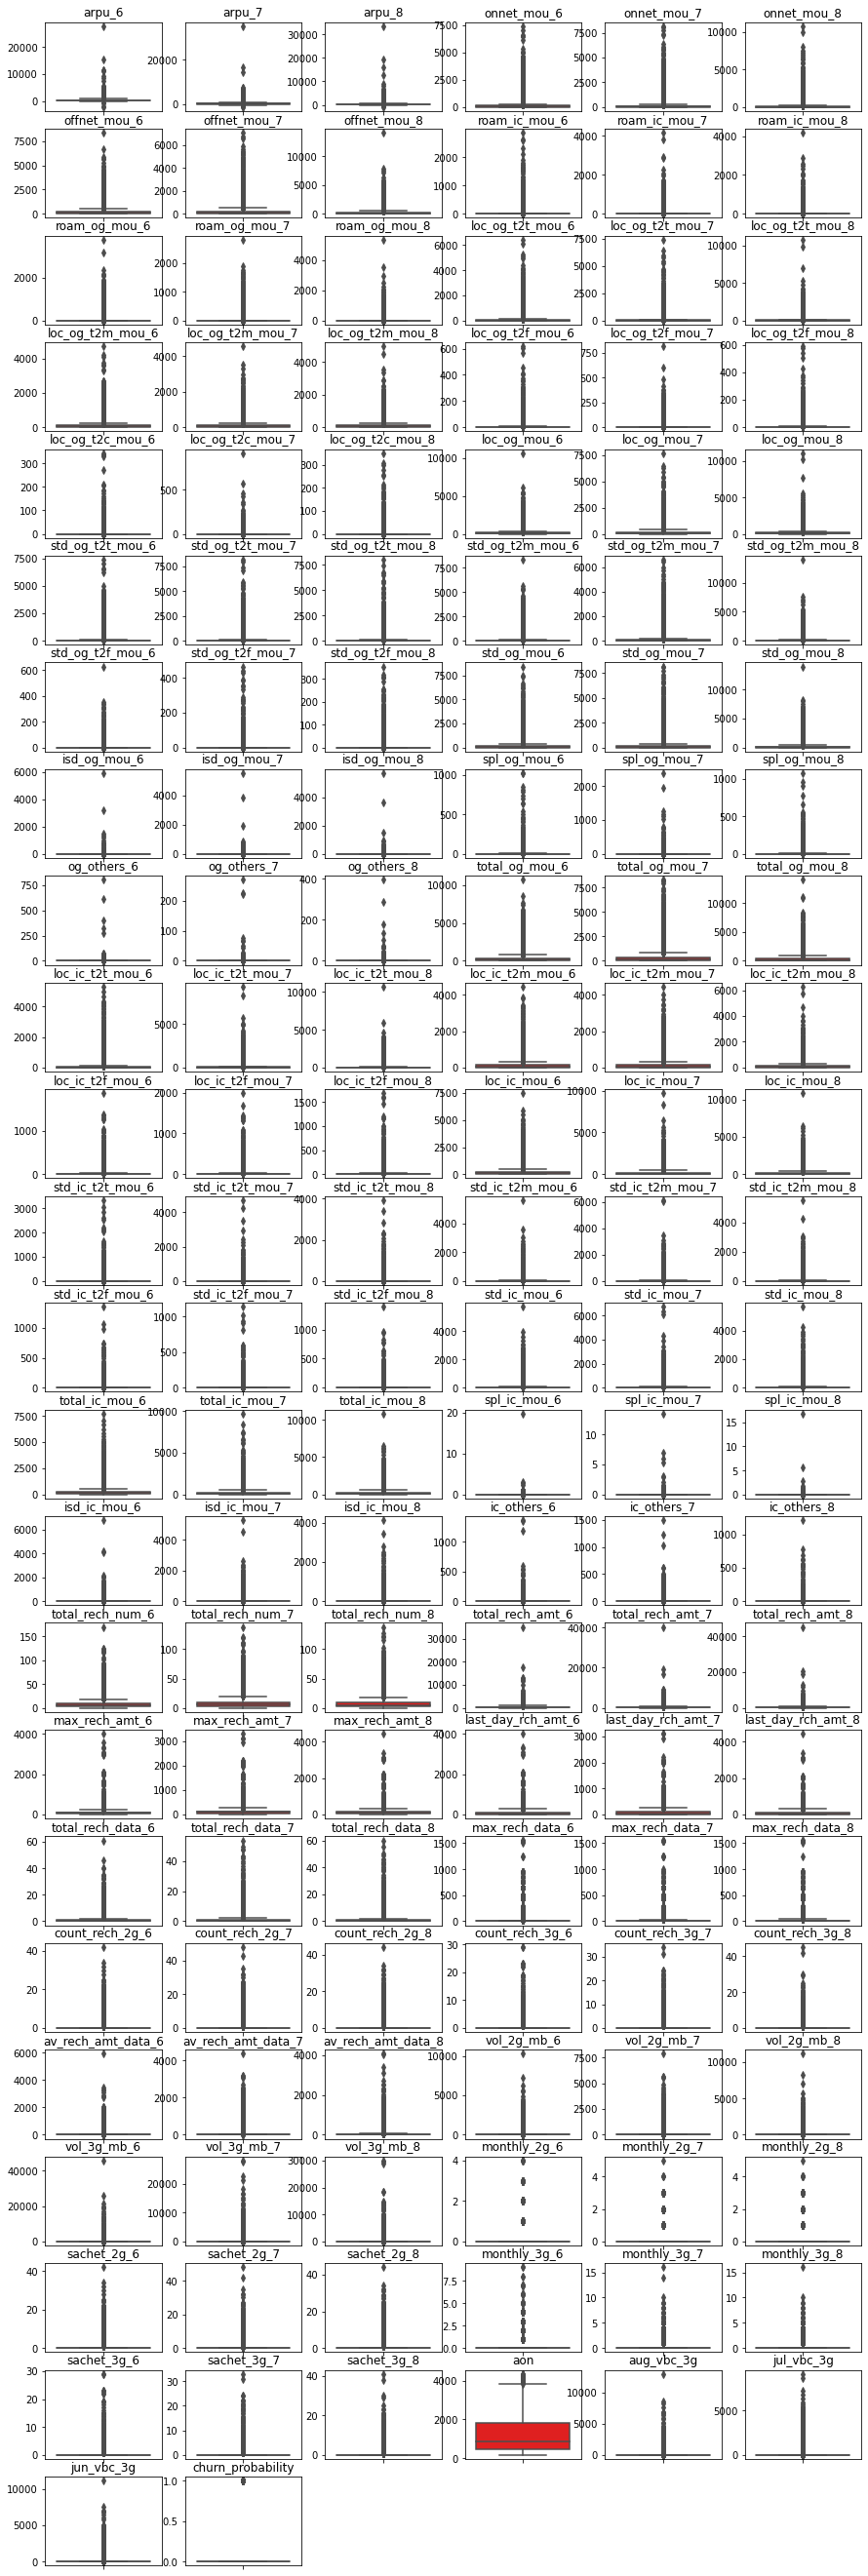

In [25]:
plt.figure(figsize=[15,50])
for i,j in itertools.zip_longest(numeric, range(len(numeric))):
    plt.subplot(25,6,j+1)
    ax = sns.boxplot(y = df[i], color='red')
    ax.set(ylabel=None)
    plt.title(i)

##### Observations:
- There seems to be a few outliers that have high value in all of the relevant columns, let's analyse these outliers 

In [26]:
df[df.arpu_6 > 10000]

id     arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  \
6218    6218  11505.508      0.000      0.000       320.94          NaN   
15315  15315  11261.349  16820.145  12533.285         9.29        16.61   
15508  15508  10877.945   6498.408   5880.292       147.84       107.26   
29431  29431  15487.684  14624.089  16040.503         0.18         0.00   
36595  36595  27731.088  35145.834  33543.624         5.69         5.14   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
6218           NaN        674.54           NaN           NaN           70.2   
15315        11.63       1493.98       1921.29       1498.31            0.0   
15508       146.56       1372.88        818.66        737.66            0.0   
29431         0.00       5905.14       5490.28       5836.76            0.0   
36595         7.01       3231.81       3868.59       3625.43            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
6218             NaN            NaN          203.7            NaN   
15315            0.0            0.0            0.0            0.0   
15508            0.0            0.0            0.0            0.0   
29431            0.0            1.0            0.0            0.0   
36595            0.0            0.0            0.0            0.0   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
6218             NaN            203.19               NaN               NaN   
15315           0.00              9.29             16.61             11.63   
15508           0.00            147.19            107.26            145.61   
29431         139.98              0.18              0.00              0.00   
36595           0.00              5.69              5.14              7.01   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
6218             509.34               NaN               NaN              0.65   
15315             22.39             14.54              6.28              3.35   
15508             53.54             50.73             61.23              0.00   
29431              0.00              0.00              0.00              0.60   
36595              2.51              0.40              8.29              0.00   

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
6218                NaN               NaN              0.00               NaN   
15315              0.00               0.0              0.00              0.15   
15508              3.25               0.0              0.00              0.00   
29431              0.00               0.0              1.83              0.00   
36595              0.00               0.0              0.00              0.00   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
6218                NaN        713.19           NaN           NaN   
15315              0.00         35.04         31.16         17.91   
15508              0.00        200.74        161.24        206.84   
29431              7.85          0.78          0.00          0.00   
36595              0.00          8.21          5.54         15.31   

       std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
6218              72.88               NaN               NaN             47.19   
15315              0.00               0.0              0.00              7.86   
15508              0.65               0.0              0.95              0.00   
29431              0.00               0.0              0.00              2.05   
36595              0.00               0.0              0.00              0.00   

       std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
6218                NaN               NaN               0.0               NaN   
15315              2.25              0.91               0.0               0.0   
15508              1.41              0.00               0.0               0.0   


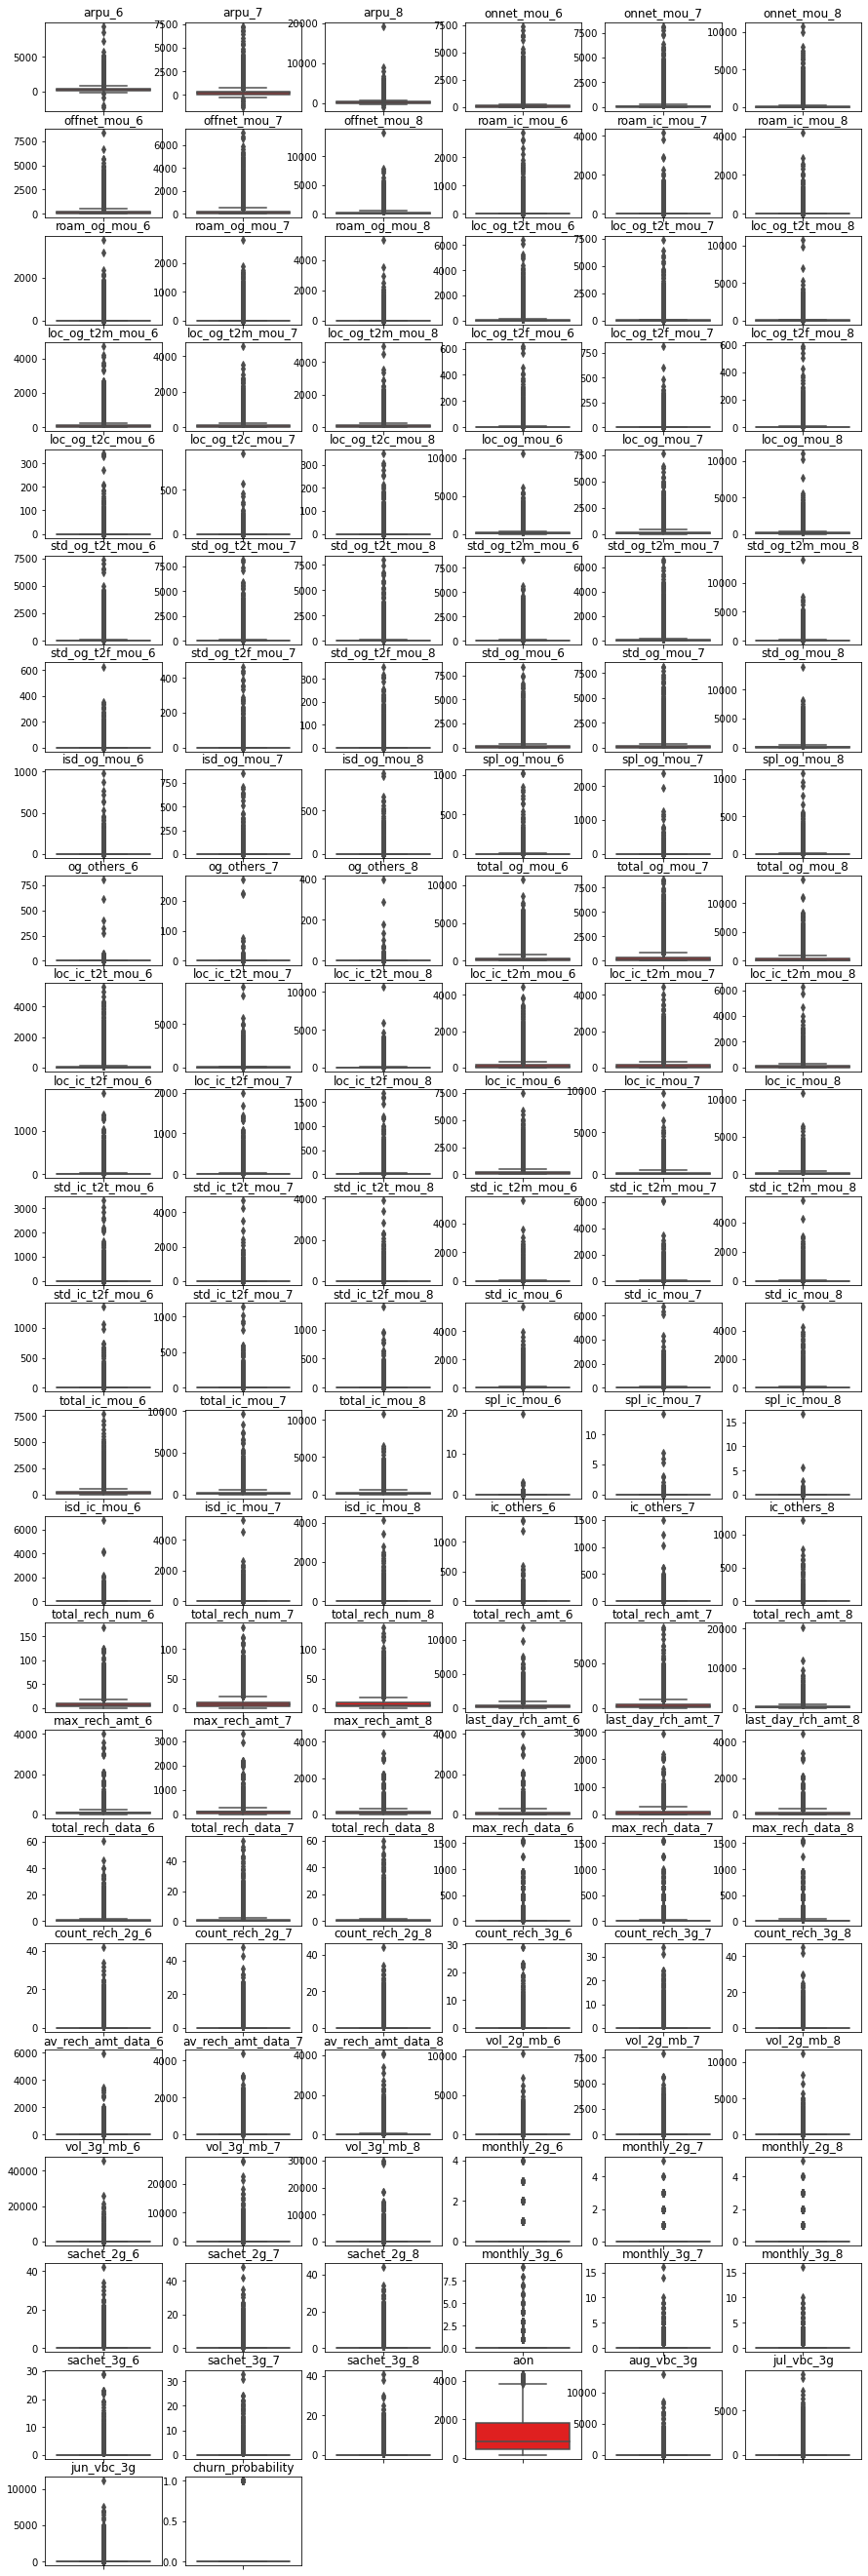

In [27]:
df4 = df[~(df.arpu_6 > 10000)]
plt.figure(figsize=[15,50])
for i,j in itertools.zip_longest(numeric, range(len(numeric))):
    plt.subplot(25,6,j+1)
    ax = sns.boxplot(y = df4[i], color='red')
    ax.set(ylabel=None)
    plt.title(i)

##### Observations:
- There are quiet a few outliers in the data, as it seems, these are not mistaken data rows as the outliers have high values across all the variables.
- Hence we might have to log/sqrt transform these numeric columns before scalling

In [28]:
for i in numeric:
    df[i].fillna(0, inplace=True)

In [29]:
t5 = pd.DataFrame(round(df.isnull().sum()/len(df),2)*100, columns=["Null %"])
t5[t5['Null %']!=0].sort_values(by = ["Null %"],ascending=False)

Empty DataFrame
Columns: [Null %]
Index: []

___
___

# 3. Graphical Analysis

### Univariate Analysis

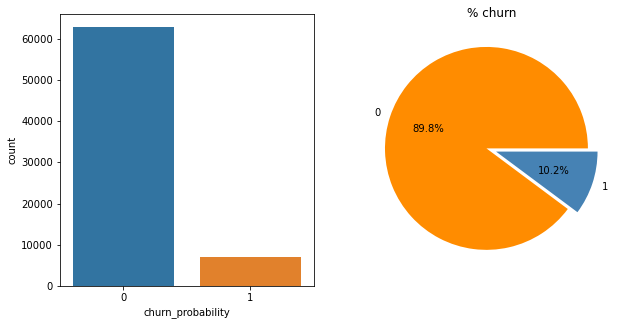

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'churn_probability', data = df)
plt.subplot(1,2,2)
df.groupby(['churn_probability']).size().plot(kind='pie', y='counted',title ='% churn', ylabel='',colors=['darkorange','steelblue'], autopct='%1.1f%%', explode=(0.05, 0.05), startangle =0)
plt.show()

#### Let's Evaluate Total's columns seggregation

In [31]:
df_total = df.loc[:, df.columns.str.contains("total")]

In [32]:
t0 = pd.pivot_table(df,values = df_total.columns,columns= 'churn_probability',aggfunc='sum')
t0

churn_probability            0           1
total_ic_mou_6     12991065.40   988479.69
total_ic_mou_7     13446782.41   684477.73
total_ic_mou_8     13623383.56   270440.32
total_og_mou_6     18938185.76  2513108.30
total_og_mou_7     20007575.00  1732201.61
total_og_mou_8     20655008.96   660601.05
total_rech_amt_6   20467665.00  2501792.00
total_rech_amt_7   20823710.00  1742313.00
total_rech_amt_8   21807224.00   861697.00
total_rech_data_6     39578.00     3773.00
total_rech_data_7     44891.00     2987.00
total_rech_data_8     47656.00     1194.00
total_rech_num_6     471813.00    57836.00
total_rech_num_7     493894.00    45565.00
total_rech_num_8     479661.00    26077.00

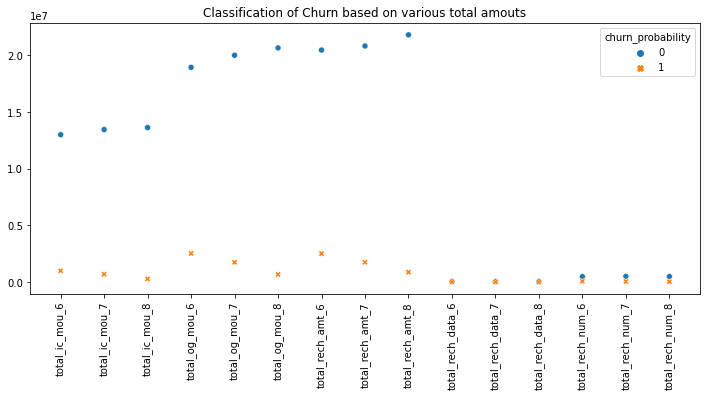

In [33]:
plt.figure(figsize=[12,5])
sns.scatterplot(data=t0)
plt.xticks(rotation=90)
plt.title("Classification of Churn based on various total amouts").set_position([0.5,1])
plt.show()

#### Observations:
- Seems like there is a pattern in total usage. __Churning customers tend to use lesser in total in general__
- __Specially in churning (last) month the trend of churn is declining while trend of non-churn is increasing__ 
- Total Incoming, Outgoing, Recharge Amount seem like more important from classification perspective, than total data recharge and recharge number

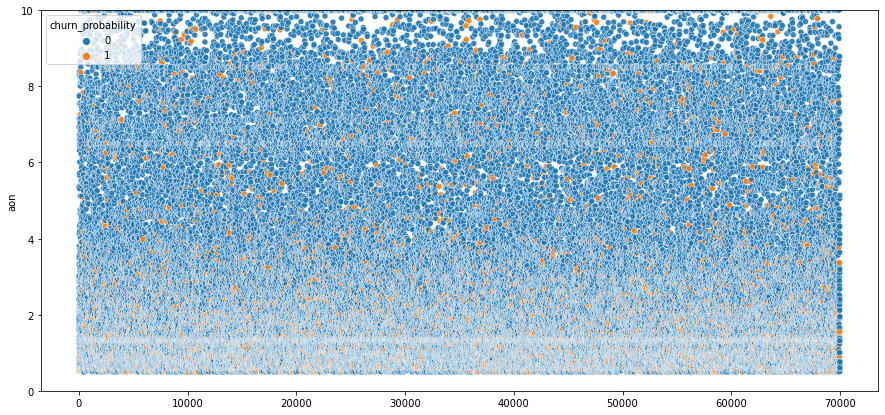

In [34]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=df['aon'] / 365, x=df.index, hue=df['churn_probability'], alpha=0.9,sizes={'0':10,'1':200})
plt.ylim(0,10)
plt.show()

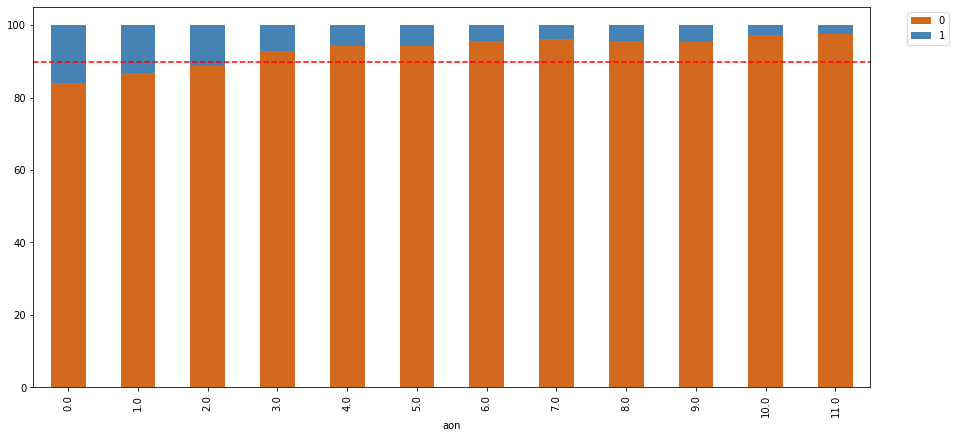

In [35]:
(df.groupby((df['aon'] / 365).apply(np.floor))['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot( 
                                            kind = 'bar', stacked=True, figsize = (15,7), color=['chocolate','steelblue'])
plt.legend(bbox_to_anchor = (1.1,1))
plt.axhline(y=100 - df['churn_probability'].mean()*100, color = 'r', linestyle='--' ,label ='Average Churn')
#plt.bar_label(container, fmt='%0.1f', color = 'white')
plt.show()    

##### Observations: 
- __There seems to be a high number of users that churn are on network since less than 2 years__

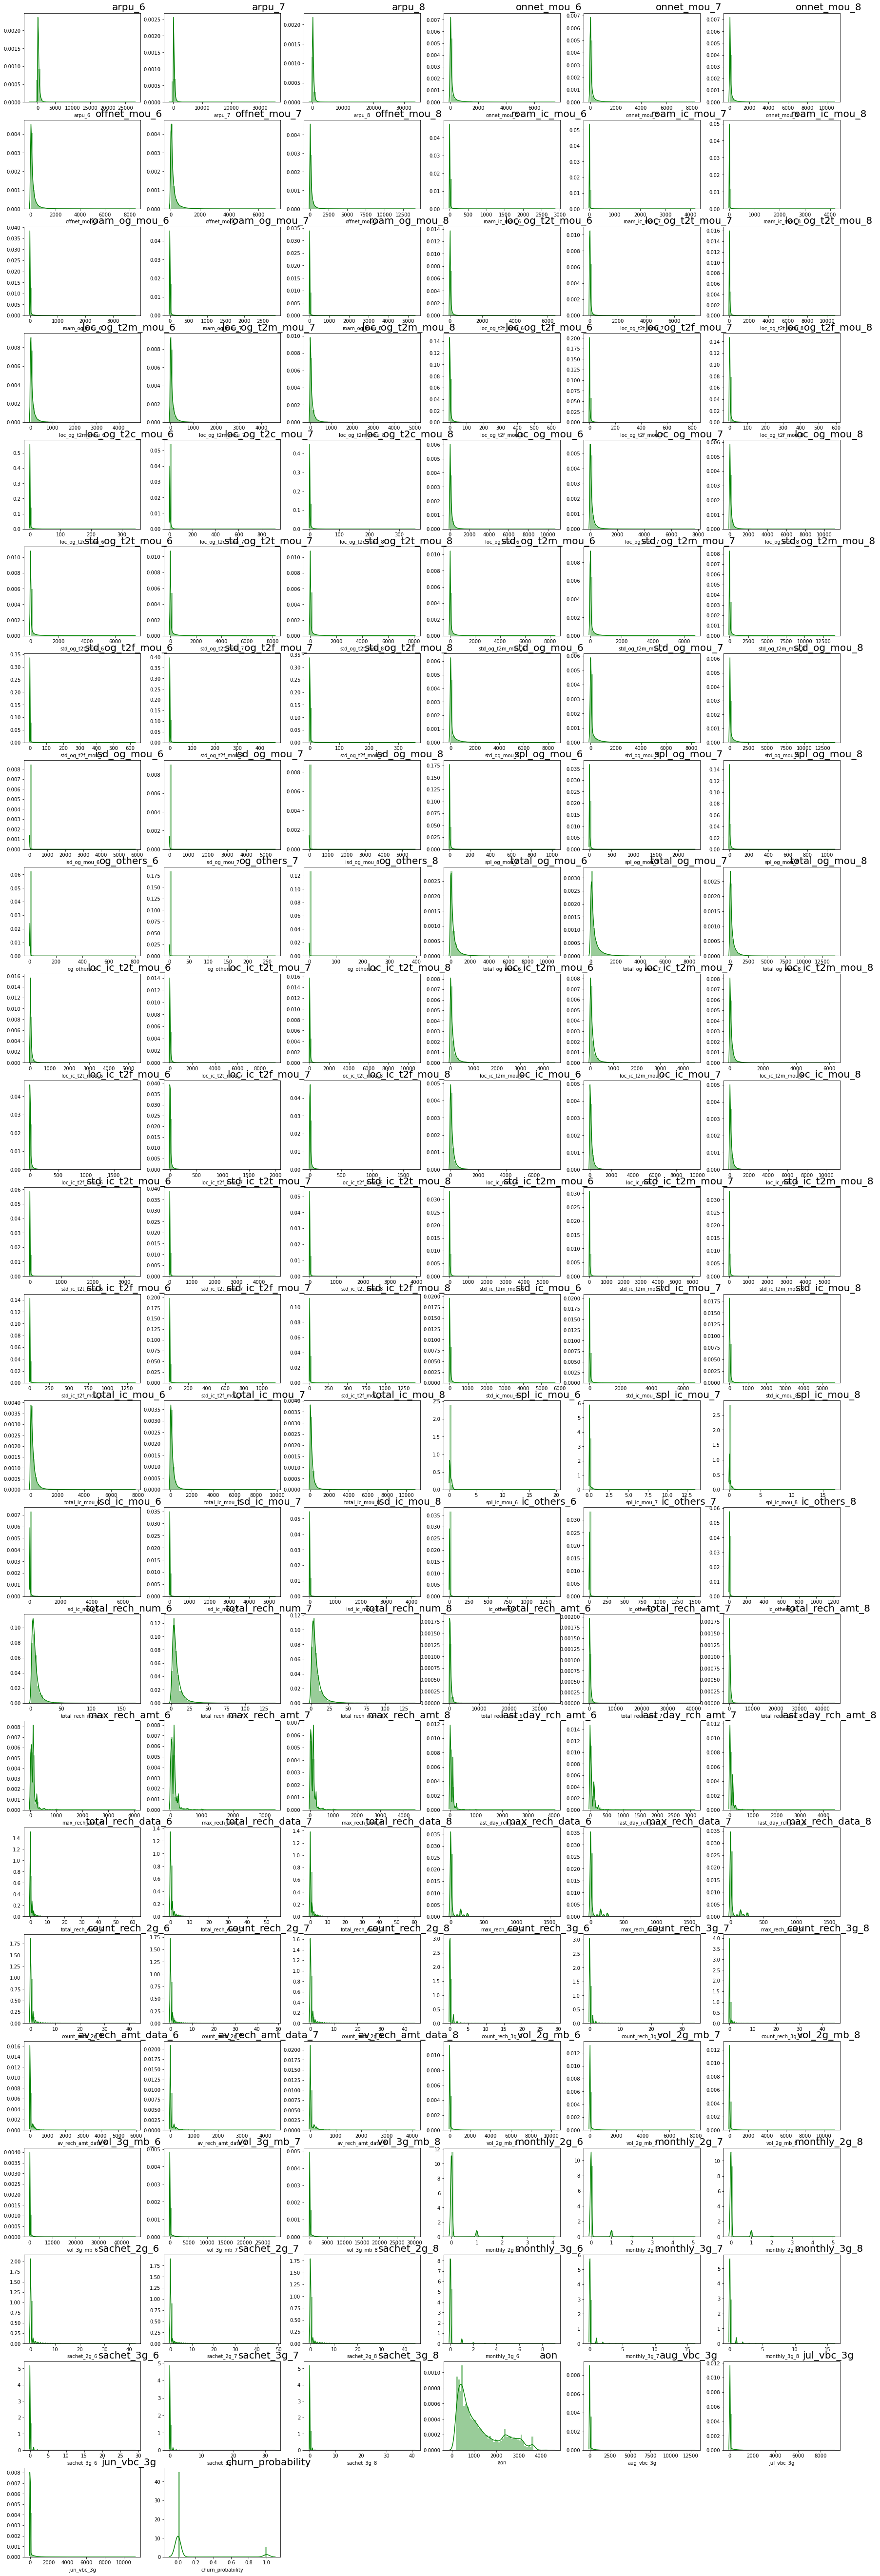

In [36]:
plt.figure(figsize=[30,100])
for i,j in itertools.zip_longest(numeric, range(len(numeric))):
    plt.subplot(25,6,j+1)
    ax = sns.distplot(df[i], color='green')
    ax.set(ylabel=None)
    ax.title.set_position([0.9, 1])
    plt.title(i,fontdict={'fontsize':20})

##### Observations:
- All of the features are skewed, while most of them have valid outliers. Hence we might need variable transformtion (log)

In [37]:
#print(df.columns.to_list())

____
____

# 4. Feature Engineering

#### It is essential that we understand trend of people who churn; 
__We also saw that in general churning people tend to use lesser services in last month (from univariate analysis)__

- For this we can take an average of 6th and 7th month
- Compare this average with 8th month and decide on growth or decline in each of the parameter
- This will serve 2 purpose, number of columns for analysis will reduce as well as we will have more reliable metrics as it shows growth and decline


- Total Numbers are also helpful as we can see from univariate analysis, So we keep those as combined (sum)

- Additionally, we have 3 columns that have month name instead of month number. We will have to change their name as well

##### Renaming columns with month name

In [38]:
df.rename(columns={'aug_vbc_3g':'vbc_3g_8', 'jul_vbc_3g':'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6'}, inplace=True)

##### Adding Total Columns to get final total of 3 months

In [39]:
#print(df_total.columns)
df['total_og_mou_all_month'] = df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1)
df['total_ic_mou_all_month'] = df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1)
df['total_rech_amt_all_month'] = df[['total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8']].sum(axis=1)
df['total_rech_num_all_month'] = df[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8']].sum(axis=1)

In [40]:
month_6_cols = [col for col in df.columns if "_6" in col]
month_7_cols = [col for col in df.columns if "_7" in col]
month_8_cols = [col for col in df.columns if "_8" in col]

In [41]:
df_months = pd.DataFrame({'month_6_cols':month_6_cols,'month_7_cols':month_7_cols,'month_8_cols':month_8_cols})
df_months.head()

month_6_cols   month_7_cols   month_8_cols
0         arpu_6         arpu_7         arpu_8
1    onnet_mou_6    onnet_mou_7    onnet_mou_8
2   offnet_mou_6   offnet_mou_7   offnet_mou_8
3  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
4  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8

In [42]:
df_featured = df.copy()

print("\n Dataframe Shape Before feature engineering: ", df_featured.shape)

for k,l,m in itertools.zip_longest(month_6_cols, month_7_cols, month_8_cols):
    df_featured[k] = df_featured[[k,l]].mean(axis=1)
    df_featured[l] = df_featured[k] - df_featured[m]
    
df_featured.columns = df_featured.columns.str.replace(r'_7','_change_over_months')

#cols = [col for col in df_featured.columns if col.contains(['_6','_8'])]
df_featured = df_featured.loc[:, ~df_featured.columns.str.contains("_6")]
df_featured = df_featured.loc[:, ~df_featured.columns.str.contains("_8")]

print("\n Dataframe Shape After feature engineering: ", df_featured.shape)


 Dataframe Shape Before feature engineering:  (69999, 148)

 Dataframe Shape After feature engineering:  (69999, 54)


In [43]:
df_featured.head()

id  arpu_change_over_months  onnet_mou_change_over_months  \
0   0                  51.6160                        85.190   
1   1                  18.4405                         0.000   
2   2                  81.9910                         8.230   
3   3                  69.7160                        11.635   
4   4                  82.8845                         6.925   

   offnet_mou_change_over_months  roam_ic_mou_change_over_months  \
0                         62.130                            0.00   
1                        -17.895                            0.00   
2                         68.020                            0.00   
3                         23.390                            0.00   
4                         37.920                           26.82   

   roam_og_mou_change_over_months  loc_og_t2t_mou_change_over_months  \
0                           0.000                              0.835   
1                           0.000                              0.000   
2                           0.000                              6.755   
3                          -1.630                              5.465   
4                           7.865                              1.365   

   loc_og_t2m_mou_change_over_months  loc_og_t2f_mou_change_over_months  \
0                              8.335                                0.0   
1                              0.000                                0.0   
2                             12.055                                0.0   
3                             17.770                                0.0   
4                             23.700                                1.6   

   loc_og_t2c_mou_change_over_months  loc_og_mou_change_over_months  \
0                              0.000                          9.175   
1                            -18.785                          0.000   
2                              1.070                         18.810   
3                             -8.030                         23.245   
4                              4.925                         26.665   

   std_og_t2t_mou_change_over_months  std_og_t2m_mou_change_over_months  \
0                              84.35                             49.680   
1                               0.00                              0.000   
2                               1.47                             55.495   
3                               6.16                             16.030   
4                               0.00                              2.175   

   std_og_t2f_mou_change_over_months  std_og_mou_change_over_months  \
0                               0.00                        134.030   
1                               0.00                          0.000   
2                               0.00                         56.965   
3                               0.28                         22.475   
4                               0.00                          2.175   

   isd_og_mou_change_over_months  spl_og_mou_change_over_months  \
0                            0.0                          4.415   
1                            0.0                        -16.295   
2                            0.0                          2.135   
3                            0.0                        -13.570   
4                            0.0                          8.500   

   og_others_change_over_months  total_og_mou_change_over_months  \
0                          0.19                          147.815   
1                          0.00                          -16.295   
2                          0.00                           77.925   
3                          0.00                           32.165   
4                          0.00                           37.340   

   loc_ic_t2t_mou_change_over_months  loc_ic_t2m_mou_change_over_months  \
0                             -4.735                             -5.955   
1                             -0.145                      

##### Observations:
- There are several columns that have high correlation (based on color) we need to operate and remove these highly correlated columns for best results

In [44]:
#QC Step
#df[['offnet_mou_6','offnet_mou_7','offnet_mou_8']].head()

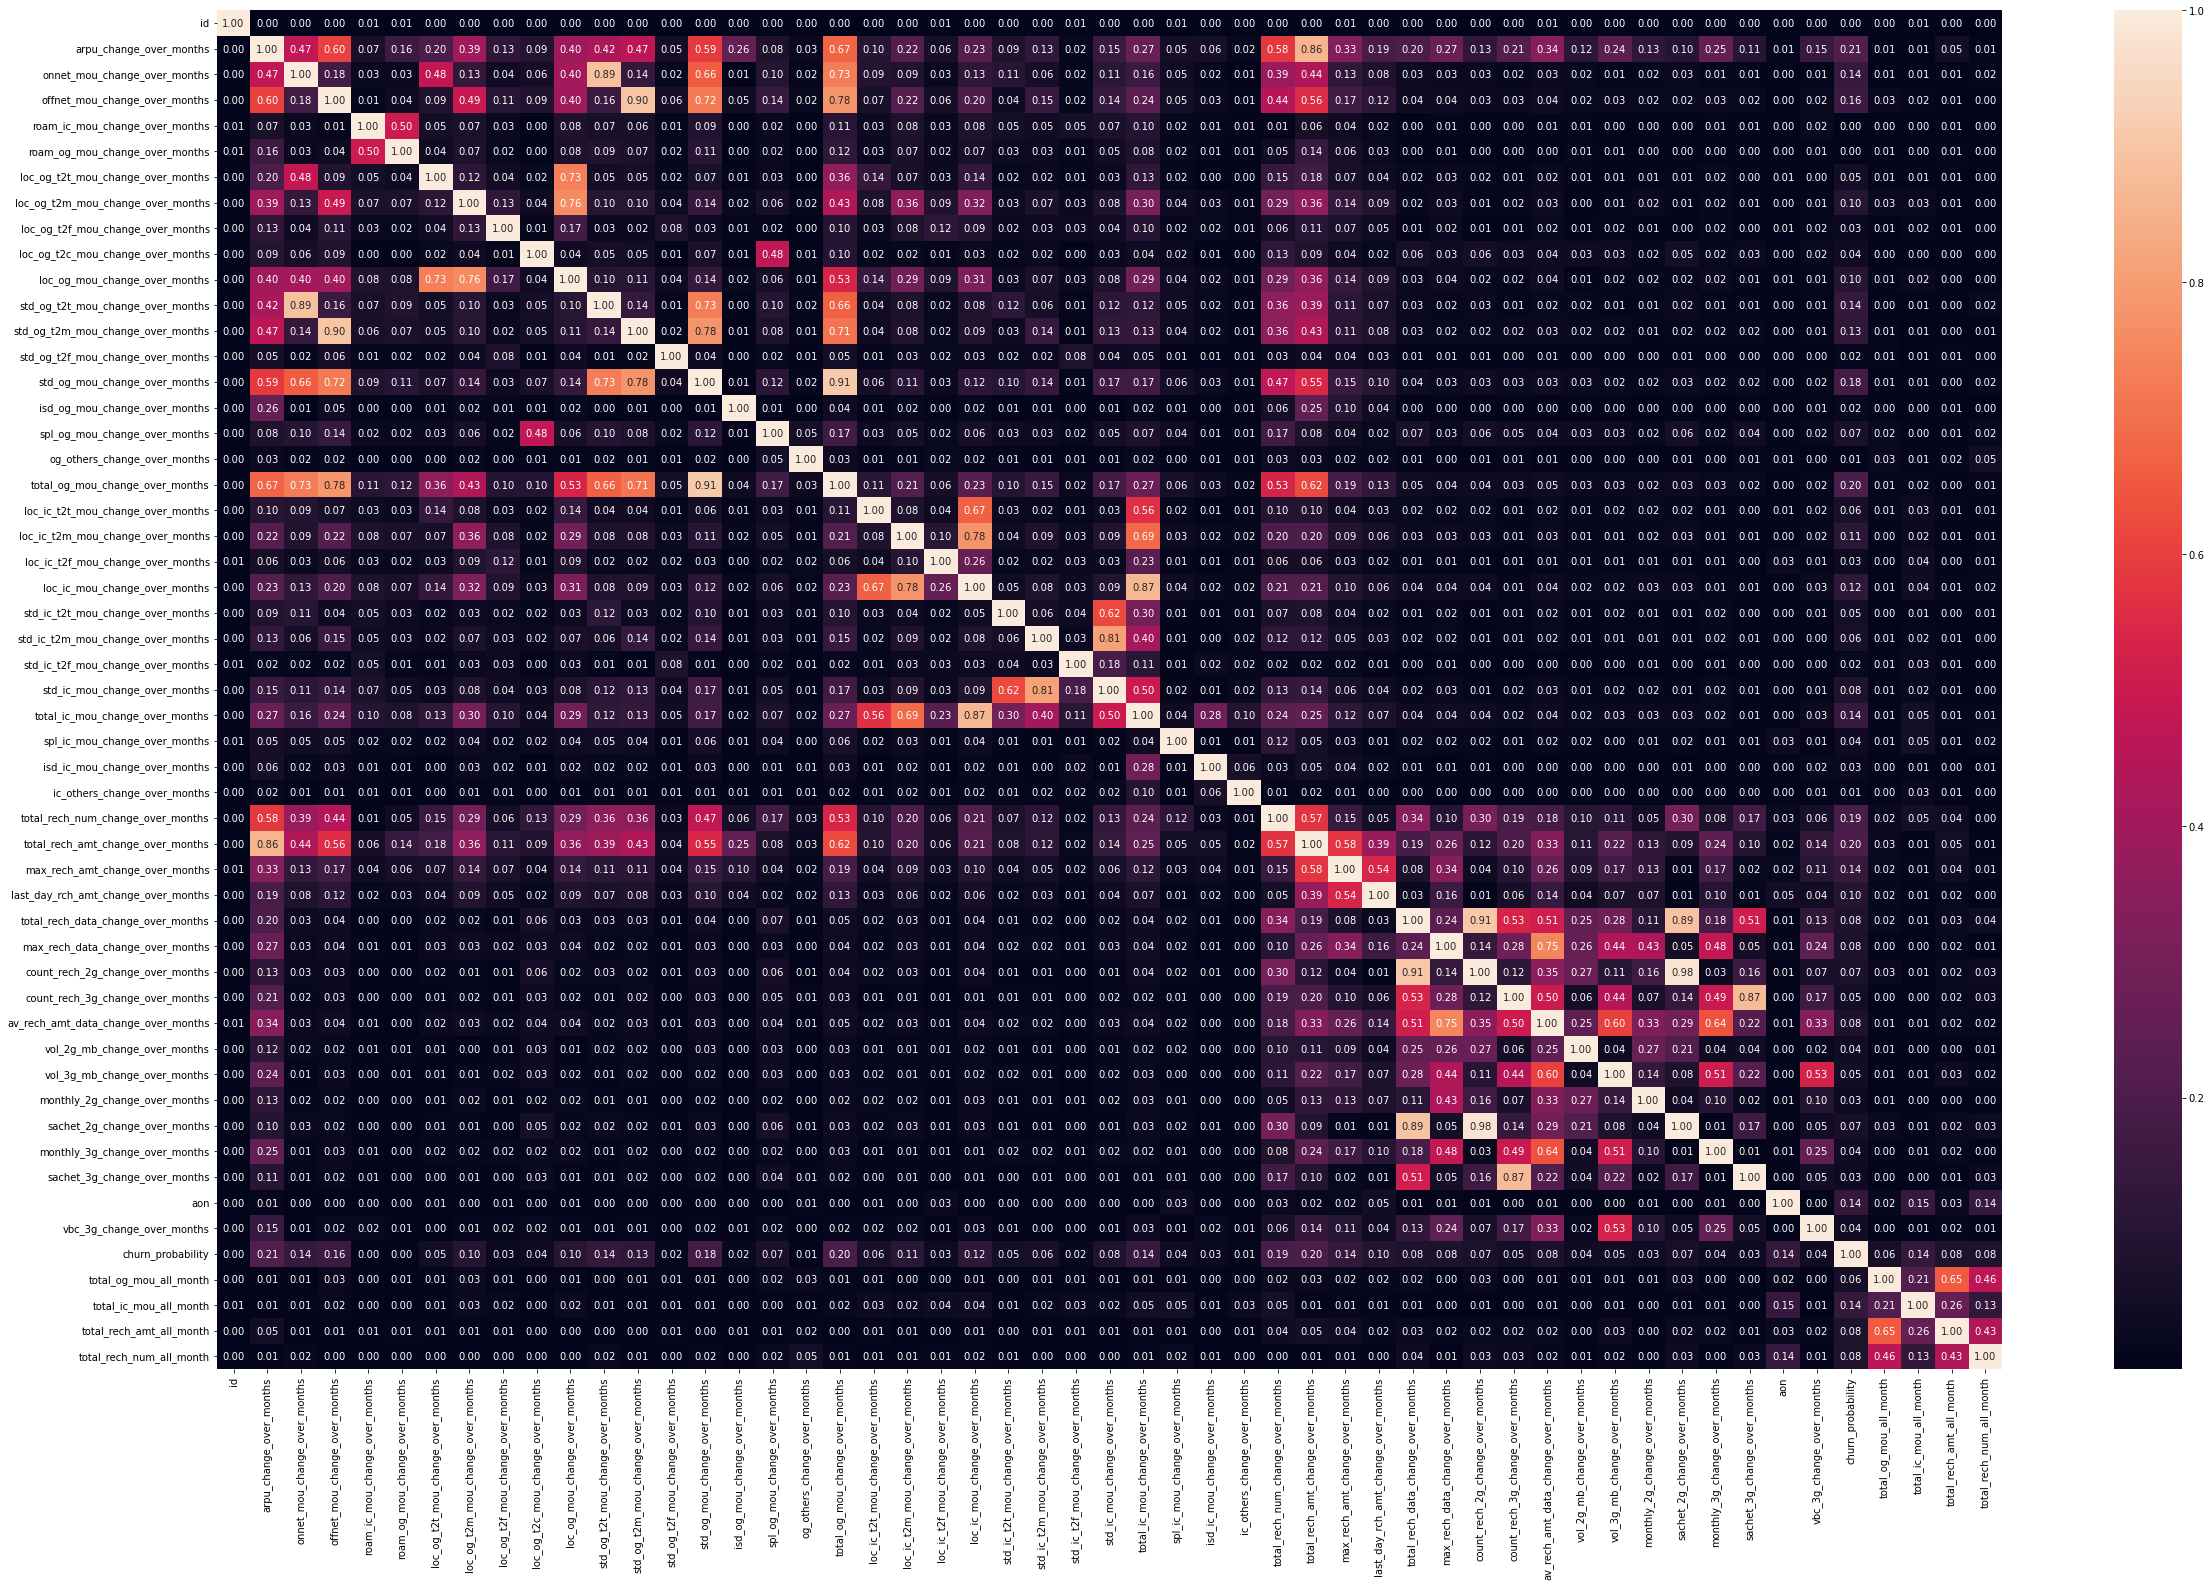

In [45]:
plt.figure(figsize= [40,25])
sns.heatmap(df_featured.corr().abs(), annot=True, fmt="0.2f")
plt.show()

##### Observations:
- __There are several columns that have srong multicollinearity__
- We will have to remove these columns
- We will remove any correlation that is equal or over 75% here, and let RFE take care of the rest later


- offnest_mou_change_over_month has very high correlation with std_og_t2m_mou_change_over_month; We can remove th later as it is very specific and has more high correlations
- total_og_mou has very high correlation with std_og_mou_change_over_months; We can remove the total column as it is very generic and has a strong correlatin with most of the og_mous
- Similar observations can be made for all of the columns that are combination / total for og or ic

In [46]:
df_for_pca = df_featured.copy()

print("\n Dataframe Shape Before removing the columns: ", df_featured.shape)
df_featured.drop(['total_og_mou_change_over_months','total_ic_mou_change_over_months',\
                  'total_rech_num_change_over_months','total_rech_amt_change_over_months',\
                  'std_og_mou_change_over_months', 'std_ic_mou_change_over_months',\
                  'loc_ic_mou_change_over_months', 'loc_og_mou_change_over_months',\
                  'std_og_t2t_mou_change_over_months', 'std_og_t2m_mou_change_over_months', \
                  'total_rech_data_change_over_months', 'count_rech_2g_change_over_months',\
                  'count_rech_3g_change_over_months','max_rech_amt_change_over_months', \
                  'last_day_rch_amt_change_over_months', 'date_of_last_rech_data_change_over_months', \
                  'max_rech_data_change_over_months' 
                  #,'av_rech_amt_data_change_over_months','arpu_change_over_months',\
                  #'vol_3g_mb_change_over_months','total_og_mou_all_month', 'total_rech_amt_all_month', \
                  #'total_rech_num_all_month'
                 ],
                  axis=1, inplace=True)

#df_featured.drop(['vol_3g_mb_change_over_months','total_og_mou_all_month', 'total_rech_amt_all_month', 'total_rech_num_all_month'], axis=1, inplace=True)

print("\n Dataframe Shape After removing the columns: ", df_featured.shape)


 Dataframe Shape Before removing the columns:  (69999, 54)

 Dataframe Shape After removing the columns:  (69999, 37)


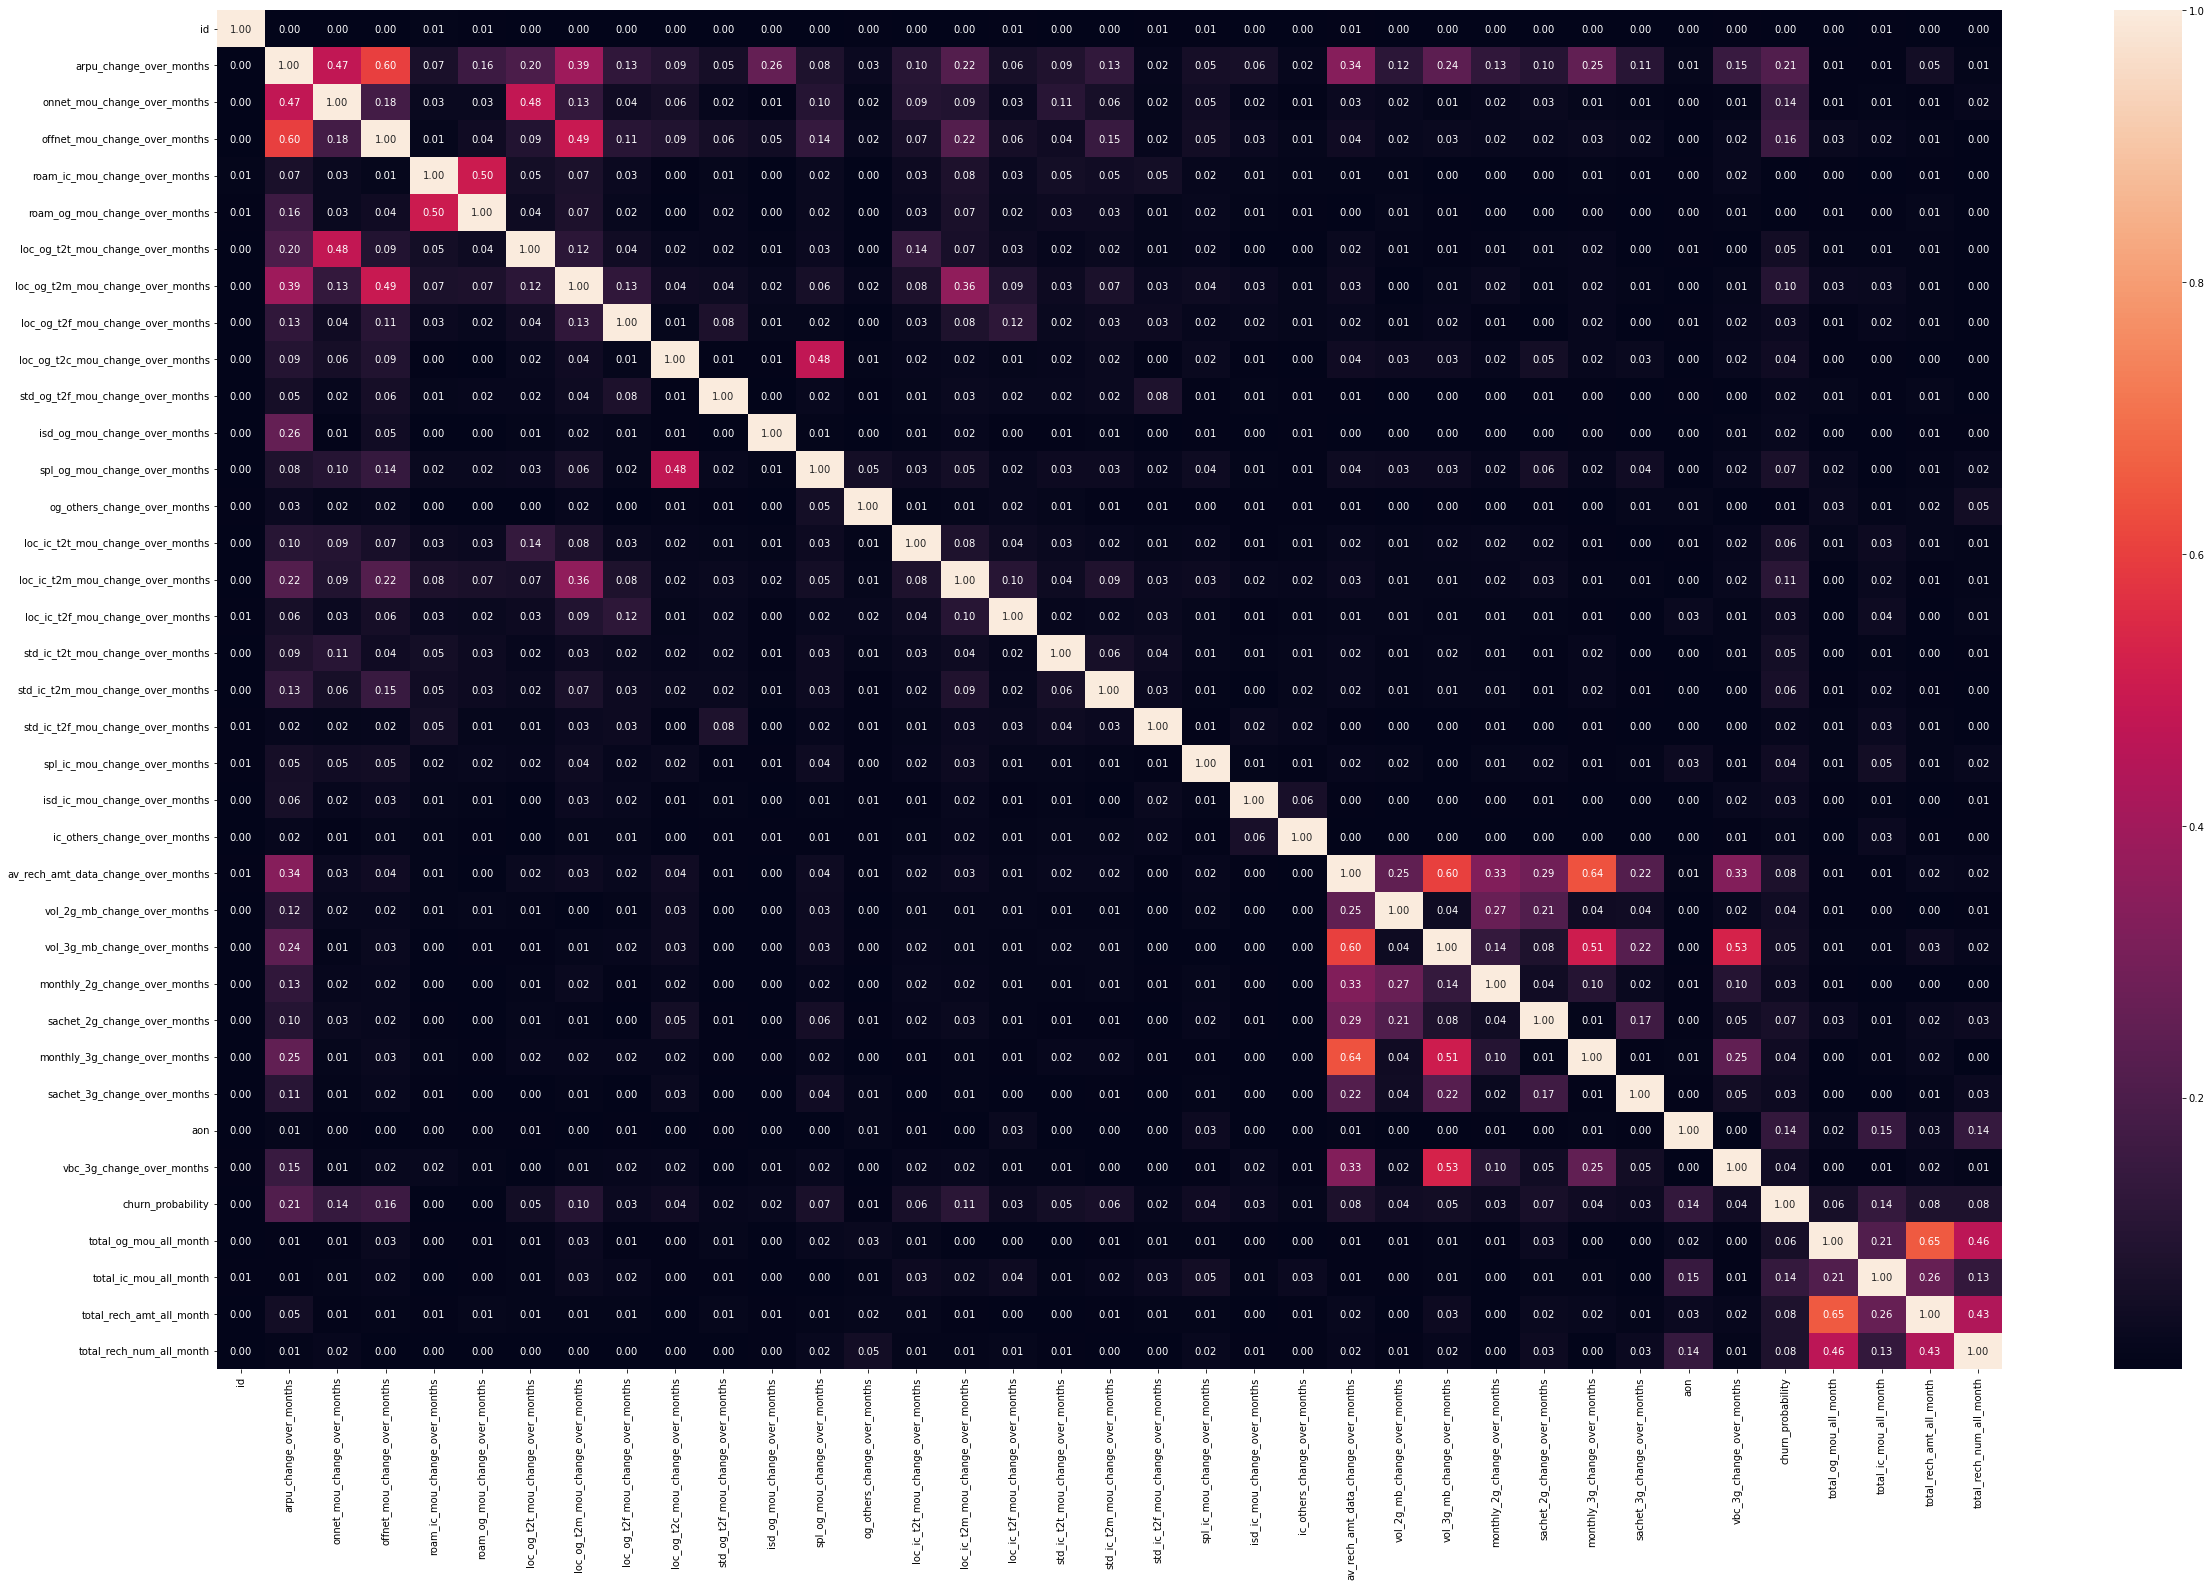

In [47]:
plt.figure(figsize= [40,25])
sns.heatmap(df_featured.corr().abs(), annot=True, fmt = "0.2f")
plt.show()

In [48]:
print(df_featured.columns.to_list())

['id', 'arpu_change_over_months', 'onnet_mou_change_over_months', 'offnet_mou_change_over_months', 'roam_ic_mou_change_over_months', 'roam_og_mou_change_over_months', 'loc_og_t2t_mou_change_over_months', 'loc_og_t2m_mou_change_over_months', 'loc_og_t2f_mou_change_over_months', 'loc_og_t2c_mou_change_over_months', 'std_og_t2f_mou_change_over_months', 'isd_og_mou_change_over_months', 'spl_og_mou_change_over_months', 'og_others_change_over_months', 'loc_ic_t2t_mou_change_over_months', 'loc_ic_t2m_mou_change_over_months', 'loc_ic_t2f_mou_change_over_months', 'std_ic_t2t_mou_change_over_months', 'std_ic_t2m_mou_change_over_months', 'std_ic_t2f_mou_change_over_months', 'spl_ic_mou_change_over_months', 'isd_ic_mou_change_over_months', 'ic_others_change_over_months', 'av_rech_amt_data_change_over_months', 'vol_2g_mb_change_over_months', 'vol_3g_mb_change_over_months', 'monthly_2g_change_over_months', 'sachet_2g_change_over_months', 'monthly_3g_change_over_months', 'sachet_3g_change_over_months

___
___
# 5. Data Preperation

In [49]:
dff = df_featured.drop('id', axis=1)
Y = dff['churn_probability']
X = dff.drop(['churn_probability'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [50]:
# PCA Cols without removing any multicollinearity
dff_pca = df_for_pca.drop(['id','date_of_last_rech_data_change_over_months'], axis=1)
Y_p = dff_pca['churn_probability']
X_p = dff_pca.drop(['churn_probability'], axis =1)

Xpca_train, Xpca_test, y_train_pca, y_test_pca = train_test_split(X_p, Y_p, test_size=0.3, random_state=42)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(Xpca_train.shape)

(48999, 35)
(48999,)
(21000, 35)
(21000,)
(48999, 51)


### Class Imbalance Treatment

In [52]:
train_churn_perc = y_train.sum()/len(y_train)
train_churn_perc*100

10.157350150003062

##### We have seen that there is high class imbalance as data has only 10% of the churn portion
- __We decide to do over or under smaplling based on row similarities__

#### Rows Similarity

In [53]:
# from sklearn.metrics.pairwise import pairwise_distances
# pairwise_distances(df,metric='cosine')

In [54]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
X_res_pca, y_res_pca = smote.fit_resample(Xpca_train,y_train_pca)

In [55]:
print(X_res.shape)
print(y_res.shape)
print(X_res_pca.shape)
print(y_res_pca.shape)

(88044, 35)
(88044,)
(88044, 51)
(88044,)


In [56]:
X_res.describe()

arpu_change_over_months  onnet_mou_change_over_months  \
count             88044.000000                  88044.000000   
mean                 69.073283                     41.812442   
std                 262.884127                    235.946750   
min              -12808.617000                  -6359.920000   
25%                 -37.390673                     -3.331250   
50%                  58.796673                      6.808988   
75%                 154.346475                     46.273730   
max                5811.052500                   3209.825000   

       offnet_mou_change_over_months  roam_ic_mou_change_over_months  \
count                   88044.000000                    88044.000000   
mean                       53.311425                        1.515400   
std                       258.460170                       46.848423   
min                     -5246.140000                    -2277.980000   
25%                       -11.140000                        0.000000   
50%                        18.417572                        0.000000   
75%                        84.358750                        0.586085   
max                      7094.390000                     1425.490000   

       roam_og_mou_change_over_months  loc_og_t2t_mou_change_over_months  \
count                    88044.000000                       88044.000000   
mean                         2.145372                           6.548833   
std                         65.272546                          82.057534   
min                      -3057.150000                       -6412.690000   
25%                          0.000000                          -0.760000   
50%                          0.000000                           1.515721   
75%                          1.689368                          10.920000   
max                       2410.835000                        2547.575000   

       loc_og_t2m_mou_change_over_months  loc_og_t2f_mou_change_over_months  \
count                       88044.000000                       88044.000000   
mean                           14.420350                           0.429759   
std                            86.898239                           6.884953   
min                         -2091.630000                        -452.720000   
25%                            -3.610000                           0.000000   
50%                             4.850732                           0.000000   
75%                            27.961250                           0.511841   
max                          2863.535000                         212.515000   

       loc_og_t2c_mou_change_over_months  std_og_t2f_mou_change_over_months  \
count                       88044.000000                       88044.000000   
mean                            0.237291                           0.180249   
std                             6.124272                           4.614133   
min                          -184.615000                        -209.935000   
25%                             0.000000                           0.000000   
50%                             0.000000                           0.000000   
75%                             0.306351                           0.000000   
max                           384.385000                         314.280000   

       isd_og_mou_change_over_months  spl_og_mou_change_over_months  \
count                   88044.000000                   88044.000000   
mean                        0.380866                       0.910734   
std                        11.806678                      15.144948   
min                      -544.780000                    -747.620000   
25%                         0.000000                       0.000000   
50%                         0.000000                       0.000000   
75%                         0.000000                       2.125000   
max                       616.715000                    1081.910000   

       og_others_change_over_mon

In [57]:
y_res.describe()

count    88044.000000
mean         0.500000
std          0.500003
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: churn_probability, dtype: float64

0    44022
1    44022
Name: churn_probability, dtype: int64


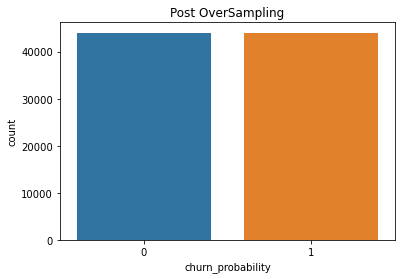

In [58]:
print(y_res.value_counts())
sns.countplot(y_res)

plt.title("Post OverSampling")
plt.show()

### Transformation and Standardization (Scaling)

In [59]:
#X_res[X_res.columns] = np.sqrt(X_train[X_res.columns])

In [60]:
scaler = MinMaxScaler()
scale_pca = MinMaxScaler()

In [61]:
X_res[X_res.columns] = scaler.fit_transform(X_res[X_res.columns])
X_res_pca[X_res_pca.columns] =scale_pca.fit_transform(X_res_pca[X_res_pca.columns])

In [62]:
X_res.describe()

arpu_change_over_months  onnet_mou_change_over_months  \
count             88044.000000                  88044.000000   
mean                  0.691618                      0.668955   
std                   0.014119                      0.024655   
min                   0.000000                      0.000000   
25%                   0.685900                      0.664238   
50%                   0.691066                      0.665298   
75%                   0.696197                      0.669422   
max                   1.000000                      1.000000   

       offnet_mou_change_over_months  roam_ic_mou_change_over_months  \
count                   88044.000000                    88044.000000   
mean                        0.429435                        0.615503   
std                         0.020944                        0.012650   
min                         0.000000                        0.000000   
25%                         0.424212                        0.615093   
50%                         0.426607                        0.615093   
75%                         0.431951                        0.615252   
max                         1.000000                        1.000000   

       roam_og_mou_change_over_months  loc_og_t2t_mou_change_over_months  \
count                    88044.000000                       88044.000000   
mean                         0.559492                           0.716412   
std                          0.011937                           0.009158   
min                          0.000000                           0.000000   
25%                          0.559100                           0.715596   
50%                          0.559100                           0.715850   
75%                          0.559409                           0.716900   
max                          1.000000                           1.000000   

       loc_og_t2m_mou_change_over_months  loc_og_t2f_mou_change_over_months  \
count                       88044.000000                       88044.000000   
mean                            0.425021                           0.681187   
std                             0.017537                           0.010350   
min                             0.000000                           0.000000   
25%                             0.421383                           0.680541   
50%                             0.423090                           0.680541   
75%                             0.427754                           0.681311   
max                             1.000000                           1.000000   

       loc_og_t2c_mou_change_over_months  std_og_t2f_mou_change_over_months  \
count                       88044.000000                       88044.000000   
mean                            0.324872                           0.400819   
std                             0.010763                           0.008802   
min                             0.000000                           0.000000   
25%                             0.324455                           0.400475   
50%                             0.324455                           0.400475   
75%                             0.324994                           0.400475   
max                             1.000000                           1.000000   

       isd_og_mou_change_over_months  spl_og_mou_change_over_months  \
count                   88044.000000                   88044.000000   
mean                        0.469361                       0.409138   
std                         0.010165                       0.008278   
min                         0.000000                       0.000000   
25%                         0.469033                       0.408640   
50%                         0.469033                       0.408640   
75%                         0.469033                       0.409802   
max                         1.000000                       1.000000   

       og_others_change_over_mon

In [63]:
X_test[X_res.columns] = scaler.transform(X_test[X_res.columns])

In [64]:
Xpca_test[Xpca_test.columns] = scale_pca.transform(Xpca_test[Xpca_test.columns])

In [65]:
X_test.describe()

arpu_change_over_months  onnet_mou_change_over_months  \
count             21000.000000                  21000.000000   
mean                  0.687893                      0.664832   
std                   0.012195                      0.021731   
min                   0.380635                      0.168664   
25%                   0.683671                      0.663013   
50%                   0.688240                      0.664676   
75%                   0.692495                      0.666953   
max                   0.794546                      1.217925   

       offnet_mou_change_over_months  roam_ic_mou_change_over_months  \
count                   21000.000000                    21000.000000   
mean                        0.425329                        0.615397   
std                         0.019595                        0.012937   
min                        -0.596255                        0.005773   
25%                         0.422262                        0.615093   
50%                         0.425387                        0.615093   
75%                         0.428940                        0.615093   
max                         0.728582                        0.965301   

       roam_og_mou_change_over_months  loc_og_t2t_mou_change_over_months  \
count                    21000.000000                       21000.000000   
mean                         0.559451                           0.715932   
std                          0.009971                           0.009945   
min                          0.006109                           0.393913   
25%                          0.559100                           0.715000   
50%                          0.559100                           0.715707   
75%                          0.559100                           0.716664   
max                          0.713769                           1.081337   

       loc_og_t2m_mou_change_over_months  loc_og_t2f_mou_change_over_months  \
count                       21000.000000                       21000.000000   
mean                            0.422329                           0.680807   
std                             0.018850                           0.012001   
min                            -0.034407                           0.236879   
25%                             0.418755                           0.680541   
50%                             0.422282                           0.680541   
75%                             0.426393                           0.681436   
max                             0.879467                           1.072636   

       loc_og_t2c_mou_change_over_months  std_og_t2f_mou_change_over_months  \
count                       21000.000000                       21000.000000   
mean                            0.324142                           0.400568   
std                             0.009888                           0.010384   
min                            -0.050290                           0.001450   
25%                             0.324455                           0.400475   
50%                             0.324455                           0.400475   
75%                             0.324455                           0.400475   
max                             0.653805                           0.755911   

       isd_og_mou_change_over_months  spl_og_mou_change_over_months  \
count                   21000.000000                   21000.000000   
mean                        0.468994                       0.408374   
std                         0.006911                       0.006820   
min                         0.030220                       0.291695   
25%                         0.469033                       0.408252   
50%                         0.469033                       0.408640   
75%                         0.469033                       0.409285   
max                         0.746116                       0.587708   

       og_others_change_over_mon

### PCA
__Let's apply PCA to identify components__


__We can use this PCA later__

In [66]:
pca = PCA(random_state=41)
#, n_components=20

In [67]:
X_pca = pca.fit_transform(Xpca_train)
X_pca.shape

(48999, 51)

In [68]:
pca.components_

array([[-1.24496441e-03, -1.55857668e-03,  5.37936335e-03, ...,
         1.86927051e-01,  5.85158269e-01,  6.07280799e-03],
       [-4.29770463e-03, -7.37863747e-04,  3.11743823e-04, ...,
         3.11365345e-01,  3.89567070e-02, -2.80361161e-03],
       [ 6.52596075e-03,  9.23326798e-03,  6.34942198e-03, ...,
         9.04714500e-01,  6.24598143e-02,  8.02962208e-04],
       ...,
       [ 0.00000000e+00,  1.03973718e-18, -3.79492693e-17, ...,
         1.30998930e-19,  2.95339185e-19, -6.44041632e-17],
       [ 0.00000000e+00, -4.30112108e-18, -2.67241890e-17, ...,
        -2.15091582e-21,  1.07978407e-19,  5.73072693e-18],
       [ 0.00000000e+00, -9.44197963e-18, -4.27378223e-17, ...,
         4.49602461e-20,  7.77979856e-20,  8.84857669e-18]])

In [69]:
pca.explained_variance_ratio_

array([4.56651877e-01, 1.84717742e-01, 1.12307216e-01, 7.38886481e-02,
       6.84644586e-02, 3.35482821e-02, 1.40541316e-02, 1.30043383e-02,
       1.07967739e-02, 6.65176033e-03, 5.93721874e-03, 5.26532050e-03,
       2.91269859e-03, 2.31947527e-03, 2.20225067e-03, 1.55342458e-03,
       1.19751383e-03, 1.07715705e-03, 9.03229806e-04, 7.37184722e-04,
       4.98068475e-04, 3.88237226e-04, 2.56773002e-04, 2.06085585e-04,
       1.61103756e-04, 1.00010459e-04, 4.85144237e-05, 4.43298935e-05,
       2.74234458e-05, 2.12161557e-05, 1.74238018e-05, 1.62594824e-05,
       7.93247745e-06, 6.03318478e-06, 3.94053980e-06, 3.32117995e-06,
       1.86317795e-06, 6.03852037e-07, 1.20504648e-07, 2.10777029e-08,
       9.07298648e-09, 8.09006035e-09, 2.63159406e-12, 1.90557701e-12,
       1.60920918e-12, 1.35628990e-12, 1.02784828e-12, 9.02272153e-13,
       2.33948090e-33, 2.33948090e-33, 2.33948090e-33])

In [70]:
print("\nFirst 10 components seem to explain ", round(pca.explained_variance_ratio_[0:10].sum()*100,2) ,"% of variance in the target\n")



First 10 components seem to explain  97.41 % of variance in the target



#### Scree Plot

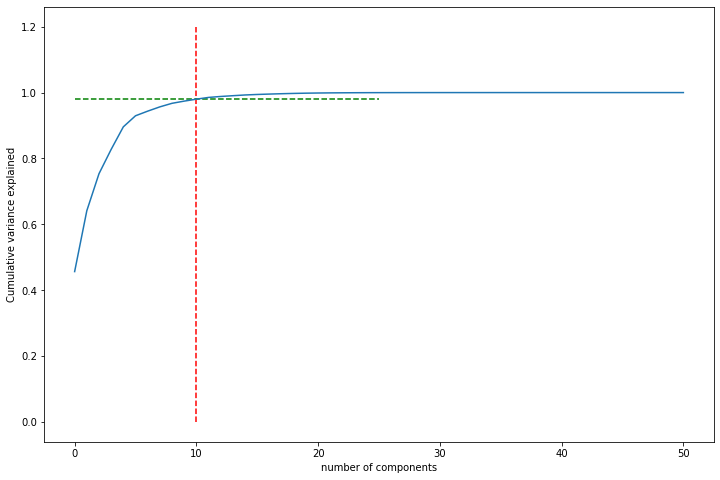

In [71]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=10, ymax=1.2, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=25, xmin=0, colors="g", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [72]:
pca_inc = IncrementalPCA(n_components=11)

In [73]:
X_train_pca = pca_inc.fit_transform(X_res_pca)

In [74]:
X_test_pca = pca_inc.transform(Xpca_test)

___
___

# 6. Model Building

In [75]:
model_scores = []

In [76]:
def model_evaluation(actual, pred):
    acc_score = round(accuracy_score(actual, pred)*100,2)
    print('Accuracy Score : ',acc_score)

    roc_score = round(roc_auc_score(actual, pred)*100,2)
    print('ROC AUC score : ',roc_score)
    
    prec_score = round(precision_score(actual, pred)*100,2)
    print('Precision score : ', prec_score)
    
    rec_score = round(recall_score(actual, pred)*100,2)
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score

## 6.1. Logistic Regression 

##### We will first use RFE method, if that does not converge, we can use PCA components with Logistic Regression

### 6.1.1 __RFE and further VIF technique to identify important features__ 

In [77]:
X_train_lr = X_res.copy()
y_train_lr = y_res.copy()

In [78]:
#y_train_lr = y_train_lr.values.reshape(-1,1)

In [79]:
#y_train_lr

In [80]:
lm= LogisticRegression()
lm.fit(X_train_lr,y_train_lr)
rfe = RFE(lm,n_features_to_select=25)
rfe = rfe.fit(X_train_lr,y_train_lr)
list(zip(X_train_lr.columns,rfe.support_,rfe.ranking_))
rfe_df = pd.DataFrame({'Predictor': X_train_lr.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by = 'Ranking')

Predictor  Select Status  Ranking
0               arpu_change_over_months           True        1
32               total_ic_mou_all_month           True        1
31               total_og_mou_all_month           True        1
30            vbc_3g_change_over_months           True        1
29                                  aon           True        1
28         sachet_3g_change_over_months           True        1
26         sachet_2g_change_over_months           True        1
22  av_rech_amt_data_change_over_months           True        1
20        isd_ic_mou_change_over_months           True        1
19        spl_ic_mou_change_over_months           True        1
33             total_rech_amt_all_month           True        1
16    std_ic_t2t_mou_change_over_months           True        1
15    loc_ic_t2f_mou_change_over_months           True        1
14    loc_ic_t2m_mou_change_over_months           True        1
17    std_ic_t2m_mou_change_over_months           True        1
12         og_others_change_over_months           True        1
1          onnet_mou_change_over_months           True        1
2         offnet_mou_change_over_months           True        1
4        roam_og_mou_change_over_months           True        1
5     loc_og_t2t_mou_change_over_months           True        1
6     loc_og_t2m_mou_change_over_months           True        1
13    loc_ic_t2t_mou_change_over_months           True        1
34             total_rech_num_all_month           True        1
8     loc_og_t2c_mou_change_over_months           True        1
11        spl_og_mou_change_over_months           True        1
23         vol_2g_mb_change_over_months          False        2
10        isd_og_mou_change_over_months          False        3
18    std_ic_t2f_mou_change_over_months          False        4
9     std_og_t2f_mou_change_over_months          False        5
7     loc_og_t2f_mou_change_over_months          False        6
27        monthly_3g_change_over_months          False        7
3        roam_ic_mou_change_over_months          False        8
25        monthly_2g_change_over_months          False        9
24         vol_3g_mb_change_over_months          False       10
21         ic_others_change_over_months          False       11

In [81]:
rfe_cols = X_train_lr.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_change_over_months', 'onnet_mou_change_over_months',
       'offnet_mou_change_over_months', 'roam_og_mou_change_over_months',
       'loc_og_t2t_mou_change_over_months',
       'loc_og_t2m_mou_change_over_months',
       'loc_og_t2c_mou_change_over_months', 'spl_og_mou_change_over_months',
       'og_others_change_over_months', 'loc_ic_t2t_mou_change_over_months',
       'loc_ic_t2m_mou_change_over_months',
       'loc_ic_t2f_mou_change_over_months',
       'std_ic_t2t_mou_change_over_months',
       'std_ic_t2m_mou_change_over_months', 'spl_ic_mou_change_over_months',
       'isd_ic_mou_change_over_months', 'av_rech_amt_data_change_over_months',
       'sachet_2g_change_over_months', 'sachet_3g_change_over_months', 'aon',
       'vbc_3g_change_over_months', 'total_og_mou_all_month',
       'total_ic_mou_all_month', 'total_rech_amt_all_month',
       'total_rech_num_all_month'],
      dtype='object')


In [82]:
def model_summary(j):
    X_train_sm = sm.add_constant(j)
    mlr = sm.GLS(y_train_lr, X_train_sm)
    mlr_model = mlr.fit()
    return mlr_model.summary()


def vif_func(k):
    vif = pd.DataFrame()
    vif['Features'] = k.columns
    vif['VIF'] = [variance_inflation_factor(k.values, i) for i in range(k.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

In [83]:
model_summary(X_train_lr[rfe_cols])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:      churn_probability   R-squared:                       0.274
Model:                            GLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1330.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:14:25   Log-Likelihood:                -49793.
No. Observations:               88044   AIC:                         9.964e+04
Df Residuals:                   88018   BIC:                         9.988e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -17.4423      0.322    -54.214      0.000     -18.073     -16.812
arpu_change_over_months                 5.6172      0.176     31.829      0.000       5.271       5.963
onnet_mou_change_over_months            1.6846      0.079     21.317      0.000       1.530       1.840
offnet_mou_change_over_months           1.7616      0.098     17.898      0.000       1.569       1.954
roam_og_mou_change_over_months         -2.0735      0.127    -16.341      0.000      -2.322      -1.825
loc_og_t2t_mou_change_over_months      -1.2243      0.177     -6.918      0.000      -1.571      -0.877
loc_og_t2m_mou_change_over_months       0.0086      0.102      0.084      0.933      -0.192       0.209
loc_og_t2c_mou_change_over_months       0.3533      0.158      2.236      0.025       0.044       0.663
spl_og_mou_change_over_months           2.2440      0.209     10.737      0.000       1.834       2.654
og_others_change_over_months            0.2200      0.377      0.584      0.559      -0.518       0.958
loc_ic_t2t_mou_change_over_months       3.9454      0.161     24.531      0.000       3.630       4.261
loc_ic_t2m_mou_change_over_months       4.2368      0.131     32.367      0.000       3.980       4.493
loc_ic_t2f_mou_change_over_months       1.4859      0.146     10.203      0.000       1.201       1.771
std_ic_t2t_mou_change_over_months       2.1948      0.157     13.963      0.000       1.887       2.503
std_ic_t2m_mou_change_over_months       2.1117      0.131     16.073      0.000       1.854       2.369
spl_ic_mou_change_over_months           5.4972      0.320     17.166      0.000       4.869       6.125
isd_ic_mou_change_over_months           1.3794      0.180      7.653      0.000       1.026       1.733
av_rech_amt_data_change_over_months     0.1962      0.063      3.137      0.002       0.074       0.319
sachet_2g_change_over_months            1.3108      0.075     17.528      0.000       1.164       1.457
sachet_3g_change_over_months            0.9364      0.168      5.560      0.000       0.606       1.267
aon                                    -0.4429      0.007    -63.164      0.000      -0.457      -0.429
vbc_3g_change_over_months               0.8606      0.111      7.735      0.000       0.643       1.079
total_og_mou_all_month                 -0.2661      0.044     -6.054      0.000      -0.352      -0.180
total_ic_mou_all_month                 -3.3582      0.048    -69.931      0.000      -3.452      -3.264
total_rech_amt_all_month               -0.8788      0.121     -7.276      0.000      -1.116      -0.642
total_rech_num_all_month               -1.3695      0.038    -35.838      0.000      -1.444      -1.295
===================================================================

In [84]:
vif_func(X_train_lr[rfe_cols])

Features          VIF
14        spl_ic_mou_change_over_months  9863.282876
8          og_others_change_over_months  7581.847708
0               arpu_change_over_months  7229.106645
4     loc_og_t2t_mou_change_over_months  7000.898285
15        isd_ic_mou_change_over_months  6169.284490
9     loc_ic_t2t_mou_change_over_months  5653.160963
18         sachet_3g_change_over_months  4821.257517
7         spl_og_mou_change_over_months  3501.633504
10    loc_ic_t2m_mou_change_over_months  2672.747940
11    loc_ic_t2f_mou_change_over_months  2489.042792
20            vbc_3g_change_over_months  2376.860012
3        roam_og_mou_change_over_months  2304.601433
13    std_ic_t2m_mou_change_over_months  1990.233751
12    std_ic_t2t_mou_change_over_months  1743.325456
1          onnet_mou_change_over_months  1330.548349
6     loc_og_t2c_mou_change_over_months  1278.881205
5     loc_og_t2m_mou_change_over_months   920.422632
2         offnet_mou_change_over_months   863.944145
17         sachet_2g_change_over_months   707.360217
16  av_rech_amt_data_change_over_months   576.836422
23             total_rech_amt_all_month     4.043100
24             total_rech_num_all_month     3.699731
21               total_og_mou_all_month     3.362996
19                                  aon     2.103442
22               total_ic_mou_all_month     1.684318

In [85]:
#rfe_cols = rfe_cols.drop('spl_ic_mou_change_over_months')

In [86]:
#model_summary(X_train_lr[rfe_cols])

In [87]:
#vif_func(X_train_lr[rfe_cols])

#### Observations:
- The Logistic Regression algorithm fails to converge despite multiple 

### 6.1.2 Logistic Rergression with PCA

#### Let's use Logistic Regression with Principal Components

In [88]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca, y_res)

y_lr_pca_pred = lr_model.predict(X_test_pca)

In [89]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_lr_pca_pred)
model_scores.append({'model_name':'LogisticRegression_pca - Test', 'acc_score':acc_score, 'roc_score':roc_score, \
                         'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  75.03
ROC AUC score :  78.05
Precision score :  26.66
Recall score :  81.86


___
## 6.2 Decision Tree

#### Decision Trees do not bother about scalling. So let's go ahead with Oversampled Data

### 6.2.1 Decision Tree with Normal Features

In [90]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth = 4)

In [91]:
dt_base.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [92]:
y_dt_res_pred = dt_base.predict(X_res)
y_dt_test_pred = dt_base.predict(X_test)

In [93]:
print(classification_report(y_test, y_dt_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     18845
           1       0.34      0.84      0.49      2155

    accuracy                           0.82     21000
   macro avg       0.66      0.83      0.69     21000
weighted avg       0.91      0.82      0.85     21000



In [94]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_dt_test_pred)
# add the model scores to score list
model_scores.append({'model_name':'DecisionTree Classifier - Test', 'acc_score':acc_score, \
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  81.73
ROC AUC score :  82.77
Precision score :  34.16
Recall score :  84.08


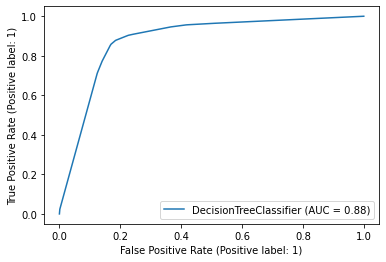

In [95]:
plot_roc_curve(dt_base, X_res, y_res, drop_intermediate=False)
plt.show()

### 6.2.2  Decision Tree with Normal Features - HyperParameter Tuning

In [96]:
dt = DecisionTreeClassifier(random_state=42)

In [97]:
dt_params = {
    'max_depth': [2,3,5,7,10], #,20,25],
    'min_samples_leaf': [5,20,50, 100, 500],
    'min_samples_split':[5,10,20,25]
}

In [98]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=dt_params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = True,
                          scoring='accuracy')

In [99]:
%%time
grid_search.fit(X_res, y_res)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
CPU times: user 2.87 s, sys: 612 ms, total: 3.48 s
Wall time: 51.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [5, 20, 50, 100, 500],
                         'min_samples_split': [5, 10, 20, 25]},
             scoring='accuracy', verbose=True)

In [100]:
grid_search.best_score_

0.8785380037254101

In [101]:
dt_best = grid_search.best_estimator_
print(dt_best)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)


In [102]:
dt_best_params = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,random_state=42)

In [103]:
dt_best_params.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

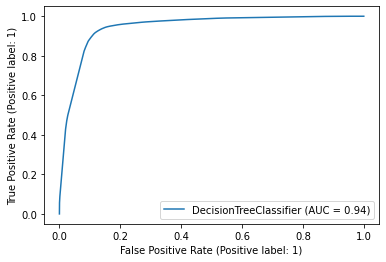

In [104]:
plot_roc_curve(dt_best_params, X_res, y_res, drop_intermediate=False)
plt.show()

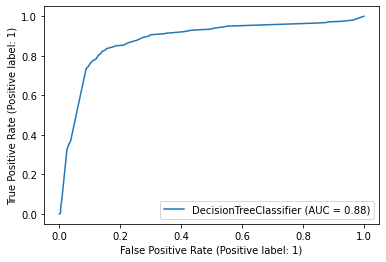

In [105]:
plot_roc_curve(dt_best, X_test, y_test, drop_intermediate=False)
plt.show()

In [106]:
y_best_dt_res_pred = dt_best_params.predict(X_res)
y_best_dt_test_pred = dt_best_params.predict(X_test)

In [107]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, y_best_dt_res_pred)
# add the model scores to score list
model_scores.append({'model_name':'DecisionTree Classifier BestParams - Train', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  89.99
ROC AUC score :  89.99
Precision score :  88.29
Recall score :  92.21


In [108]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_best_dt_test_pred)

#print("Scores for )
model_scores.append({'model_name':'DecisionTree Classifier BestParams - Test', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  85.59
ROC AUC score :  84.1
Precision score :  40.13
Recall score :  82.23


#### Decision Tree model is slightly overfitting

### 6.2.3  Decision Tree with PCA - HyperParameter Tuning

In [109]:
dt_pca = DecisionTreeClassifier(random_state=42)

In [110]:
dt_params = {
    'max_depth': [2,3,5,7,10], #,20,25],
    'min_samples_leaf': [5,20,50, 100, 500],
    'min_samples_split':[5,10,20,25]
}

In [111]:
grid_search = GridSearchCV(estimator=dt_pca,
                          param_grid=dt_params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = True,
                          scoring='accuracy')

In [112]:
%%time
grid_search.fit(X_train_pca, y_res)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
CPU times: user 2.14 s, sys: 410 ms, total: 2.55 s
Wall time: 32.6 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'min_samples_leaf': [5, 20, 50, 100, 500],
                         'min_samples_split': [5, 10, 20, 25]},
             scoring='accuracy', verbose=True)

In [113]:
grid_search.best_score_

0.8262913997546681

In [114]:
dt_best_pca = grid_search.best_estimator_
print(dt_best_pca)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)


In [115]:
dt_best_pca.fit(X_train_pca, y_res)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [116]:
y_best_dt_res_pca_pred = dt_best_pca.predict(X_train_pca)
y_best_dt_test_pca_pred = dt_best_pca.predict(X_test_pca)

In [117]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, y_best_dt_res_pca_pred)
# add the model scores to score list
model_scores.append({'model_name':'DecisionTree Classifier BestParams PCA - Train', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  85.09
ROC AUC score :  85.09
Precision score :  86.42
Recall score :  83.27


In [118]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_best_dt_test_pca_pred)

#print("Scores for )
model_scores.append({'model_name':'DecisionTree Classifier BestParams PCA - Test', 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  83.69
ROC AUC score :  78.97
Precision score :  35.62
Recall score :  73.04


___
## 6.3 RANDOM FOREST

### 6.3.1 Random Forest (Without Hypertuning)

In [119]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, oob_score=True)
rf_model.fit(X_train_pca, y_res)
y_rf_pca_pred = rf_model.predict(X_test_pca)

In [120]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, rf_model.predict(X_train_pca))
model_scores.append({'model_name':'RandomForestClassifier - Train', 'acc_score':acc_score, 'roc_score':roc_score, \
                     'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  100.0
ROC AUC score :  100.0
Precision score :  100.0
Recall score :  100.0


In [121]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_rf_pca_pred)
model_scores.append({'model_name':'RandomForestClassifier - Test', 'acc_score':acc_score, 'roc_score':roc_score, \
                     'precision_score':prec_score, 'recall_score':rec_score})

Accuracy Score :  88.82
ROC AUC score :  80.03
Precision score :  46.97
Recall score :  68.96


In [122]:
rf_model.oob_score_

0.9161669165417291

#### This model without tuning overfits

### 6.3.2 Hyperparameter tuning for Random Forest Classifier

In [123]:
rf_hyper = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [124]:
params = {'max_depth': [3, 5, 7,10],# 15, 20],
                #'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [5,10, 20, 50, 100],
                'n_estimators': [10, 25, 50, 100]
               }

In [125]:
rf_model_cv5 = GridSearchCV(estimator=rf_hyper, 
             param_grid=params,
             verbose=1,
             cv=4,
             n_jobs=-1,
             return_train_score=True)

In [126]:
%%time
rf_model_cv5.fit(X_res, y_res)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/skl

/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/skl

/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/skl

CPU times: user 22.9 s, sys: 728 ms, total: 23.6 s
Wall time: 3min 54s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, verbose=1)

In [127]:
rf_best_model = rf_model_cv5.best_estimator_
print(rf_best_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       oob_score=True, random_state=42)


In [128]:
rf_best_model.fit(X_res, y_res)

Y_rf_best_pred = rf_best_model.predict(X_res)

Y_pred_proba = rf_best_model.predict_proba(X_test)
y_pred_test = rf_best_model.predict(X_test)

In [129]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, Y_rf_best_pred)
model_scores.append({'model_name':'Random Forest BestParams - Train', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  90.98
ROC AUC score :  90.98
Precision score :  89.84
Recall score :  92.42


In [130]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_pred_test)
model_scores.append({'model_name':'Random Forest BestPrams - Test', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  88.08
ROC AUC score :  86.08
Precision score :  45.58
Recall score :  83.57


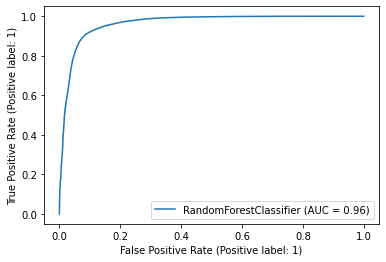

In [131]:
plot_roc_curve(rf_best_model, X_res, y_res, drop_intermediate=False)
plt.show()

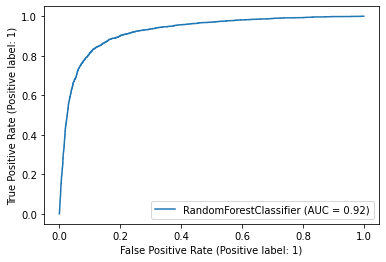

In [132]:
plot_roc_curve(rf_best_model, X_test, y_test, drop_intermediate=False)
plt.show()

#### This looks like Best model so far
___

In [133]:
#X_res.columns

#### Cross Validation

In [134]:
cross_val_score(rf_best_model, X_res, y_res, cv=5, n_jobs=-1)
cross_val_score(rf_best_model, X_res, y_res, cv=5, n_jobs=-1).mean()

0.8967562066648986

In [135]:
cross_val_score(rf_best_model, X_test, y_test, cv=5, n_jobs=-1)
cross_val_score(rf_best_model, X_test, y_test, cv=5, n_jobs=-1).mean()

0.9209047619047619

___

### 6.3.3 Random Forest with PCA _

In [136]:
%%time
rf_model_cv5.fit(X_train_pca, y_res)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/skl

/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/skl

/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sagarzanwar/opt/anaconda3/lib/python3.9/site-packages/skl

CPU times: user 13.1 s, sys: 661 ms, total: 13.8 s
Wall time: 4min 13s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             return_train_score=True, verbose=1)

In [137]:
rf_best_model_pca = rf_model_cv5.best_estimator_
rf_best_model_pca

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, oob_score=True, random_state=42)

In [138]:
#rf_best_model.fit(X_res, y_res)

Y_rf_pca_pred = rf_best_model_pca.predict(X_train_pca)

#Y_pred_proba = rf_best_model.predict_proba(X_test)
y_rf_test_pca = rf_best_model_pca.predict(X_test_pca)

In [139]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, Y_rf_pca_pred)
model_scores.append({'model_name':'Random Forest BestParams PCA - Train', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  85.53
ROC AUC score :  85.53
Precision score :  87.8
Recall score :  82.51


In [140]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_rf_test_pca)
model_scores.append({'model_name':'Random Forest BestParams PCA - Test', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  86.0
ROC AUC score :  81.1
Precision score :  40.22
Recall score :  74.94


___
## 6.4 Gradient Boosting

### 6.4.1 Gradient Boosting

In [141]:
gb = GradientBoostingClassifier(random_state=100) # default 
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [142]:
gb.fit(X_res, y_res)
gb_train_pred = gb.predict(X_res)
gb_predictions = gb.predict(X_test)

In [143]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, gb_train_pred)
model_scores.append({'model_name':'Gradient Boosting - Train', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  90.27
ROC AUC score :  90.27
Precision score :  89.34
Recall score :  91.46


In [144]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, gb_predictions)
model_scores.append({'model_name':'Gradient Boosting - Test', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  88.26
ROC AUC score :  85.11
Precision score :  45.92
Recall score :  81.16


### 6.4.2 Gradient Boosting Hyper-Tuned

In [145]:
gb_params ={
    #'n_estimators': 100,   # no of Trees 
    'learning_rate' : [0.1],
    'max_depth': [2,5,7],
    'min_samples_leaf': [5,7,10]
    #'subsample': 1,
    #'max_features' : [],
    #'random_state' : 100,
}

In [146]:
gb_grid_search = GridSearchCV(estimator=gb,
                          param_grid=gb_params,
                          cv = 4,
                          n_jobs = -1,
                          verbose = True,
                          scoring='accuracy')

In [147]:
######







# %%time
# gb_grid_search.fit(X_res,y_res)

#### In order to save run time, best parameter once found, are saved and used directly below

In [148]:
####



gb_best = GradientBoostingClassifier(max_depth=10, max_features='sqrt',
                           min_samples_leaf=10, n_estimators=500,
                           random_state=100, subsample=0.6)





# gb_best = gb_grid_search.best_estimator_
# print(gb_best)

In [149]:
gb_best.fit(X_res, y_res)

Y_gb_best_pred = gb_best.predict(X_res)

y_gb_pred_test = gb_best.predict(X_test)

In [150]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, Y_gb_best_pred)
model_scores.append({'model_name':'Light GB BestParams - Train', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  99.99
ROC AUC score :  99.99
Precision score :  99.98
Recall score :  100.0


In [151]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, y_pred_test)
model_scores.append({'model_name':'Light GB BestPrams - Test', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  88.08
ROC AUC score :  86.08
Precision score :  45.58
Recall score :  83.57


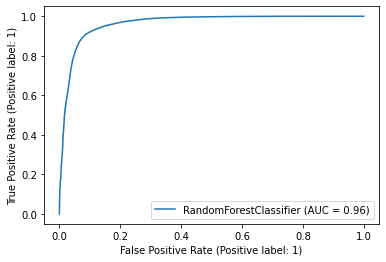

In [152]:
plot_roc_curve(rf_best_model, X_res, y_res, drop_intermediate=False)
plt.show()

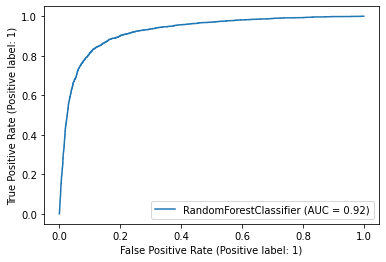

In [153]:
plot_roc_curve(rf_best_model, X_test, y_test, drop_intermediate=False)
plt.show()

___
## 6.5 XG Boost

### 6.5.1 XG Boost Normal

In [154]:
xgb_class = xgb.XGBClassifier(n_jobs =-1, objective='binary:logistic', random_state = 100)
print(xgb_class.get_params())

{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': -1, 'num_parallel_tree': None, 'predictor': None, 'random_state': 100, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [155]:
xgb_class.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, ...)

In [156]:
xgb_train_pred = xgb_class.predict(X_res)
xgb_predictions = xgb_class.predict(X_test)

In [157]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, xgb_train_pred)
model_scores.append({'model_name':'XGB - Train', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  96.12
ROC AUC score :  96.12
Precision score :  95.44
Recall score :  96.88


In [158]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, xgb_predictions)
model_scores.append({'model_name':'XGB - Test', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  91.01
ROC AUC score :  81.98
Precision score :  54.81
Recall score :  70.63


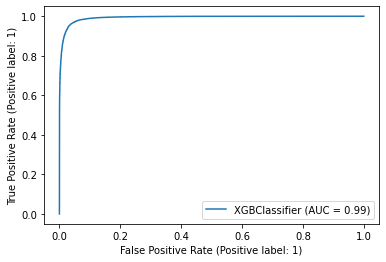

In [159]:
plot_roc_curve(xgb_class, X_res, y_res, drop_intermediate=False)
plt.show()

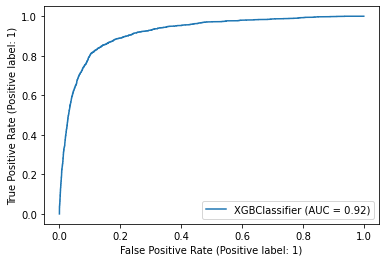

In [160]:
plot_roc_curve(xgb_class, X_test, y_test, drop_intermediate=False)
plt.show()

### 6.5.2 XG Boost Hypertuning

In [161]:
params = {
        'n_estimators' : [100, 200, 500], #, 750], # no of trees 
        'learning_rate' : [0.1, 0.25],  # eta
        #'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]#, 10, 12]
        }

param_comb = 50

In [162]:
random_search = RandomizedSearchCV(xgb_class, param_distributions=params, \
                                   n_iter=param_comb, scoring='accuracy', n_jobs=-1, \
                                   cv=4, verbose=True, random_state=42)

In [163]:
#





# %%time
# random_search.fit(X_res,y_res)

In [164]:
# Remove after 1 full run






#xgb_best = random_search.best_estimator_

#### In order to save run time, best parameter once found, are saved and used directly below

In [165]:
#

xgb_best = xgb.XGBClassifier(n_jobs =-1, objective='binary:logistic', random_state = 100, subsample= 0.6, \
                             n_estimators= 500, max_depth= 4,learning_rate= 0.1,gamma= 0.12)

xgb_best.fit(X_res,y_res)

#random_search.best_params_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.12, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=-1, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1, ...)

In [166]:
# For not running the cv again:
#  {'subsample': 0.6,
#  'n_estimators': 500,
#  'max_depth': 4,
#  'learning_rate': 0.25,
#  'gamma': 0.1}

In [167]:
xgb_best_train_pred = xgb_best.predict(X_res)
xgb_best_predictions = xgb_best.predict(X_test)

In [168]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_res, xgb_best_train_pred)
model_scores.append({'model_name':'XGB BestParams - Train', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  94.9
ROC AUC score :  94.9
Precision score :  94.26
Recall score :  95.62


In [169]:
acc_score, roc_score, prec_score, rec_score = model_evaluation(y_test, xgb_best_predictions)
model_scores.append({'model_name':'XGB BestPrams - Test', 'acc_score':acc_score,\
                     'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


Accuracy Score :  90.89
ROC AUC score :  82.72
Precision score :  54.18
Recall score :  72.44


___
# 7. Best Model Selection

In [170]:
pd.DataFrame(model_scores).drop_duplicates()

model_name  acc_score  roc_score  \
0                    LogisticRegression_pca - Test      75.03      78.05   
1                   DecisionTree Classifier - Test      81.73      82.77   
2       DecisionTree Classifier BestParams - Train      89.99      89.99   
3        DecisionTree Classifier BestParams - Test      85.59      84.10   
4   DecisionTree Classifier BestParams PCA - Train      85.09      85.09   
5    DecisionTree Classifier BestParams PCA - Test      83.69      78.97   
6                   RandomForestClassifier - Train     100.00     100.00   
7                    RandomForestClassifier - Test      88.82      80.03   
8                 Random Forest BestParams - Train      90.98      90.98   
9                   Random Forest BestPrams - Test      88.08      86.08   
10            Random Forest BestParams PCA - Train      85.53      85.53   
11             Random Forest BestParams PCA - Test      86.00      81.10   
12                       Gradient Boosting - Train      90.27      90.27   
13                        Gradient Boosting - Test      88.26      85.11   
14                     Light GB BestParams - Train      99.99      99.99   
15                       Light GB BestPrams - Test      88.08      86.08   
16                                     XGB - Train      96.12      96.12   
17                                      XGB - Test      91.01      81.98   
18                          XGB BestParams - Train      94.90      94.90   
19                            XGB BestPrams - Test      90.89      82.72   

    precision_score  recall_score  
0             26.66         81.86  
1             34.16         84.08  
2             88.29         92.21  
3             40.13         82.23  
4             86.42         83.27  
5             35.62         73.04  
6            100.00        100.00  
7             46.97         68.96  
8             89.84         92.42  
9             45.58         83.57  
10            87.80         82.51  
11            40.22         74.94  
12            89.34         91.46  
13            45.92         81.16  
14            99.98        100.00  
15            45.58         83.57  
16            95.44         96.88  
17            54.81         70.63  
18            94.26         95.62  
19            54.18         72.44

#### Observations:
- XGBoost models (with and without hypertuning) are performing the best and seem stable
- XGBoost models not only have comparable accuracies on train and test results, but they also have good recall value

In [171]:
importance = xgb_best.feature_importances_

features = X_res.columns
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

In [172]:
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance.head(15)

Sum of importance= 100.00001


variables  importance_percentage
0             arpu_change_over_months              12.904556
1      roam_og_mou_change_over_months              10.689494
2              total_ic_mou_all_month               7.155518
3   loc_ic_t2m_mou_change_over_months               6.967736
4   loc_ic_t2t_mou_change_over_months               4.984987
5       monthly_2g_change_over_months               3.540427
6       spl_ic_mou_change_over_months               3.191106
7        og_others_change_over_months               2.967077
8        sachet_2g_change_over_months               2.936907
9      roam_ic_mou_change_over_months               2.851611
10       sachet_3g_change_over_months               2.486869
11  loc_og_t2m_mou_change_over_months               2.460034
12  loc_og_t2c_mou_change_over_months               2.423368
13      monthly_3g_change_over_months               2.150339
14      isd_og_mou_change_over_months               2.146876

# Conclusion/Recomendations:
- Most of the top features are related to roaming
- Company should __consider revising roaming policy__ to support customer better
- Among top features, we can also see a pattern of use in incoming calls usage
- Company could also __try to reduce incoming charges__ (if any)
- Also, __less costing fast internet packages should also be considered__ as it also is among top features

___
___
___

# 8. Test on validation

### For Kaggle Submission

In [173]:
#X_valid = validation[X_res.columns]
validation.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [174]:
validation.rename(columns={'aug_vbc_3g':'vbc_3g_8', 'jul_vbc_3g':'vbc_3g_7', 'jun_vbc_3g':'vbc_3g_6'}, inplace=True)

In [175]:
print("\n Dataframe Shape Before feature engineering: ", validation.shape)

validation = validation.drop(l1, axis=1)
validation = validation.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)
validation.drop(t3.index.to_list(),axis=1, inplace=True)

print("\n Dataframe Shape After feature engineering: ", validation.shape)


 Dataframe Shape Before feature engineering:  (30000, 171)

 Dataframe Shape After feature engineering:  (30000, 143)


In [176]:
#print(df_total.columns)
validation['total_og_mou_all_month'] = validation[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].sum(axis=1)
validation['total_ic_mou_all_month'] = validation[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].sum(axis=1)
validation['total_rech_amt_all_month'] = validation[['total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8']].sum(axis=1)
validation['total_rech_num_all_month'] = validation[['total_rech_num_6','total_rech_num_7', 'total_rech_num_8']].sum(axis=1)


In [177]:
month_6_cols = [col for col in df.columns if "_6" in col]
month_7_cols = [col for col in df.columns if "_7" in col]
month_8_cols = [col for col in df.columns if "_8" in col]

In [178]:
df_months = pd.DataFrame({'month_6_cols':month_6_cols,'month_7_cols':month_7_cols,'month_8_cols':month_8_cols})
df_months.head()

month_6_cols   month_7_cols   month_8_cols
0         arpu_6         arpu_7         arpu_8
1    onnet_mou_6    onnet_mou_7    onnet_mou_8
2   offnet_mou_6   offnet_mou_7   offnet_mou_8
3  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8
4  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8

In [179]:
df_featured_val = validation.copy()

print("\n Dataframe Shape Before feature engineering: ", df_featured_val.shape)

for k,l,m in itertools.zip_longest(month_6_cols, month_7_cols, month_8_cols):
    df_featured_val[k] = df_featured_val[[k,l]].mean(axis=1)
    df_featured_val[l] = df_featured_val[k] - df_featured_val[m]
    
df_featured_val.columns = df_featured_val.columns.str.replace(r'_7','_change_over_months')

#cols = [col for col in df_featured.columns if col.contains(['_6','_8'])]
df_featured_val = df_featured_val.loc[:, ~df_featured_val.columns.str.contains("_6")]
df_featured_val = df_featured_val.loc[:, ~df_featured_val.columns.str.contains("_8")]

print("\n Dataframe Shape After feature engineering: ", df_featured_val.shape)


 Dataframe Shape Before feature engineering:  (30000, 147)

 Dataframe Shape After feature engineering:  (30000, 53)


In [180]:
print("\n Dataframe Shape Before removing the columns: ", df_featured_val.shape)
df_featured_val.drop(['total_og_mou_change_over_months','total_ic_mou_change_over_months',\
                  'total_rech_num_change_over_months','total_rech_amt_change_over_months',\
                  'std_og_mou_change_over_months', 'std_ic_mou_change_over_months',\
                  'loc_ic_mou_change_over_months', 'loc_og_mou_change_over_months',\
                  'std_og_t2t_mou_change_over_months', 'std_og_t2m_mou_change_over_months', \
                  'total_rech_data_change_over_months', 'count_rech_2g_change_over_months',\
                  'count_rech_3g_change_over_months','max_rech_amt_change_over_months', \
                  'last_day_rch_amt_change_over_months', 'date_of_last_rech_data_change_over_months', \
                  'max_rech_data_change_over_months'
                  #, 'av_rech_amt_data_change_over_months','arpu_change_over_months',\
                  #'vol_3g_mb_change_over_months','total_og_mou_all_month', 'total_rech_amt_all_month', \
                  #'total_rech_num_all_month'
                     ],
                  axis=1, inplace=True)

#df_featured.drop(['vol_3g_mb_change_over_months','total_og_mou_all_month', 'total_rech_amt_all_month', 'total_rech_num_all_month'], axis=1, inplace=True)

print("\n Dataframe Shape After removing the columns: ", df_featured_val.shape)



 Dataframe Shape Before removing the columns:  (30000, 53)

 Dataframe Shape After removing the columns:  (30000, 36)


In [181]:
#df_featured_val.isnull().sum().T

In [182]:
t9 = pd.DataFrame(round(df_featured_val.isnull().sum()/len(df_featured_val),2)*100, columns=["Null %"])
t9[t9['Null %']!=0].sort_values(by = ["Null %"],ascending=False).T

av_rech_amt_data_change_over_months  offnet_mou_change_over_months  \
Null %                                 79.0                            6.0   

        ic_others_change_over_months  isd_ic_mou_change_over_months  \
Null %                           6.0                            6.0   

        spl_ic_mou_change_over_months  std_ic_t2f_mou_change_over_months  \
Null %                            6.0                                6.0   

        std_ic_t2m_mou_change_over_months  std_ic_t2t_mou_change_over_months  \
Null %                                6.0                                6.0   

        loc_ic_t2f_mou_change_over_months  loc_ic_t2m_mou_change_over_months  \
Null %                                6.0                                6.0   

        loc_ic_t2t_mou_change_over_months  onnet_mou_change_over_months  \
Null %                                6.0                           6.0   

        spl_og_mou_change_over_months  isd_og_mou_change_over_months  \
Null %                            6.0                            6.0   

        std_og_t2f_mou_change_over_months  loc_og_t2c_mou_change_over_months  \
Null %                                6.0                                6.0   

        loc_og_t2f_mou_change_over_months  loc_og_t2m_mou_change_over_months  \
Null %                                6.0                                6.0   

        loc_og_t2t_mou_change_over_months  roam_og_mou_change_over_months  \
Null %                                6.0                             6.0   

        roam_ic_mou_change_over_months  og_others_change_over_months  
Null %                             6.0                           6.0

In [183]:
# total = df_featured_val.isnull().sum().sort_values(ascending=False)
# percent = ((df_featured_val.isnull().sum()/df_featured_val.isnull().count())*100).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.T.head(20)

In [184]:
val_id = pd.DataFrame(df_featured_val['id'])

In [185]:
df_featured_val.drop('id', axis=1, inplace=True)

In [186]:
for i in df_featured_val.columns:
    df_featured_val[i].fillna(0, inplace=True)

In [187]:
df_featured_val[df_featured_val.columns] = scaler.transform(df_featured_val[df_featured_val.columns])

In [188]:
#df_val_pca = pca_inc.transform(df_featured_val)

In [189]:
#y_pred_validation = gb.predict(df_featured_val)
#y_pred_validation_prob = gb_best.predict_proba(df_featured_val)

In [190]:
#y_pred_validation = dt_best_params.predict(df_featured_val)

In [191]:
#y_pred_validation = rf_best_model.predict(df_featured_val)

In [192]:
#y_pred_validation = xgb_class.predict(df_featured_val)

In [193]:
#y_pred_validation = rf_best_model.predict(df_featured_val)

In [226]:
#y_pred_validation = xgb_best.predict(df_featured_val)
y_pred_validation_prob = xgb_best.predict_proba(df_featured_val)

In [227]:
sol = pd.read_csv('solution (1).csv')
sol['churn_probability'].value_counts()

0    26941
1     3059
Name: churn_probability, dtype: int64

In [228]:
#y_pred_validation_prob.tolist()

In [229]:
val_id['churn_probability_num'] = y_pred_validation_prob[:,1].tolist()
val_id['solution'] = sol['churn_probability']
val_id

id  churn_probability_num  solution  churn_probability  new
0      69999               0.092459         0                  0    1
1      70000               0.007084         0                  0    1
2      70001               0.944386         1                  1    1
3      70002               0.010554         0                  0    1
4      70003               0.014380         0                  0    1
...      ...                    ...       ...                ...  ...
29995  99994               0.014065         0                  0    1
29996  99995               0.066897         0                  0    1
29997  99996               0.641647         0                  1    0
29998  99997               0.633843         0                  1    0
29999  99998               0.019893         0                  0    1

[30000 rows x 5 columns]

In [236]:
val_id['churn_probability'] = np.where(val_id['churn_probability_num'] > 0.65 ,1, 0)

#val_id['churn_probability_prob'] = y_pred_validation_prob[:,1].tolist()
#val_id['solution_1'] = sol['churn_probability']
val_id

id  churn_probability_num  solution  churn_probability  new
0      69999               0.092459         0                  0    1
1      70000               0.007084         0                  0    1
2      70001               0.944386         1                  1    1
3      70002               0.010554         0                  0    1
4      70003               0.014380         0                  0    1
...      ...                    ...       ...                ...  ...
29995  99994               0.014065         0                  0    1
29996  99995               0.066897         0                  0    1
29997  99996               0.641647         0                  0    0
29998  99997               0.633843         0                  0    0
29999  99998               0.019893         0                  0    1

[30000 rows x 5 columns]

In [237]:
val_id.churn_probability.value_counts()

0    27702
1     2298
Name: churn_probability, dtype: int64

In [238]:
cross_val_score(xgb_best, df_featured_val, sol['churn_probability'], cv=5, n_jobs=-1).mean()

0.9383000000000001

In [239]:
val_id['new'] = np.where(val_id.churn_probability == val_id.solution, 1,0)

In [240]:
sum(val_id['new'])/len(val_id)

0.9029

In [203]:
solution = val_id[['id','churn_probability']]

In [204]:
solution.to_csv('solution.csv', index=False)